In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("C:/Users/czvzxv/Desktop/Такси/train.csv")
test_data = pd.read_csv("C:/Users/czvzxv/Desktop/Такси/test.csv")

# Начальная предобработка и анализ данных

In [3]:
train_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [4]:
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
test_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


In [6]:
test_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


Исходя из vendor_id можно сделать вывод, что услуги такси предоставляют всего 2 компаниии

pickup_datetime и dropoff_datetime стоит преобразовать в более информативный формат

В среднем в такси ездил 1 пассажир, а максимум достигал 9

store_and_fwd_flag - показывает дохождение информации до общей базы сразу или нет. Возможно коррелирует с районом высадки

trip_duration - таргет, время поездки в секундах




In [7]:
train_data.isnull().sum(axis = 0)

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Не имеем пропущенных значений

In [8]:
train_data['pickup_datetime'] = pd.to_datetime(train_data['pickup_datetime'])
train_data['dropoff_datetime'] = pd.to_datetime(train_data['dropoff_datetime'])
train_data['vendor_id'] = train_data['vendor_id'].astype('category')
test_data['pickup_datetime'] = pd.to_datetime(test_data['pickup_datetime'])
test_data['vendor_id'] = test_data['vendor_id'].astype('category')

In [9]:
combine_data = pd.concat([train_data,test_data])

In [10]:
print(combine_data['vendor_id'].cat.categories)
print(combine_data.dtypes)

Index([1, 2], dtype='int64')
id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                float64
dtype: object


Преобразовали строковое представление даты в тип дата объекты.

Также перекодировали vendor_id в категориальный формат. Так лучше сможем отследить зависимость

In [11]:
((combine_data['dropoff_datetime'] - combine_data['pickup_datetime']).dt.total_seconds() == combine_data['trip_duration']).sum()

1458644

Данные корректны, время потраченное на путь сопоставимо с временем отбытия и прибытия

# Визуализация данных

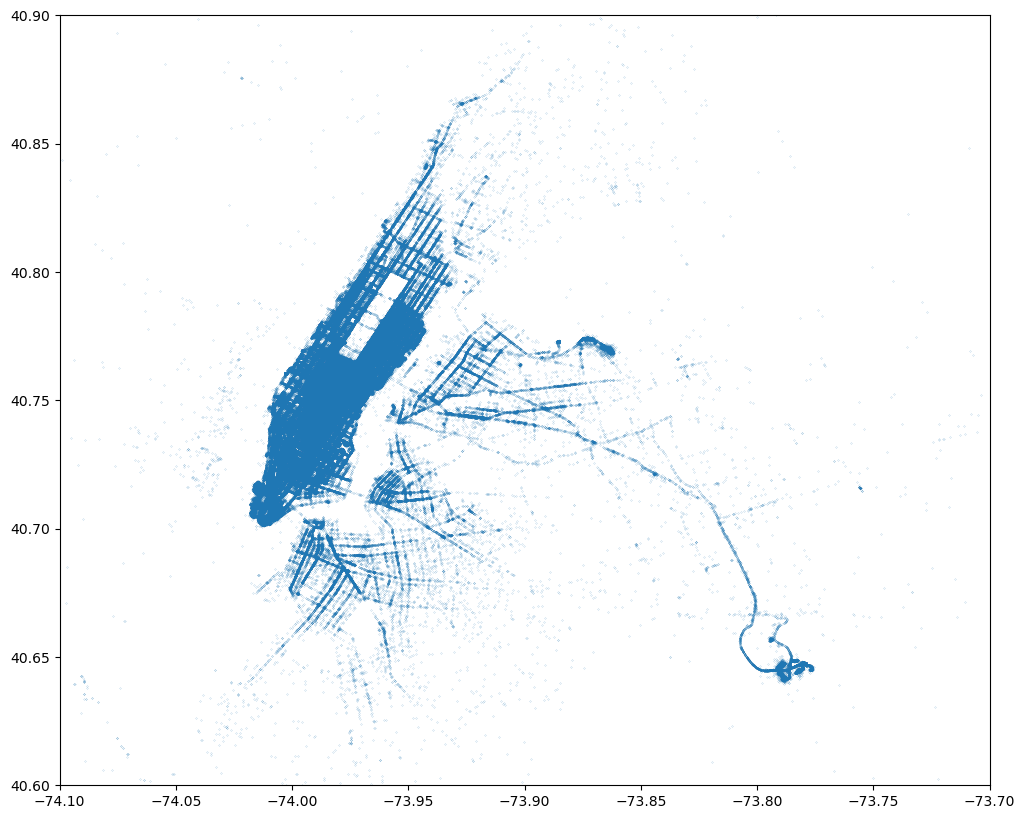

In [12]:
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(12,10))
plt.ylim(40.6, 40.9)
plt.xlim(-74.1,-73.7)
ax.scatter(train_data['pickup_longitude'],train_data['pickup_latitude'], s=0.01, alpha=1)

Оказалось, что почти все наши поездки на самом деле происходили только в Манхэттене.

Еще две заметные точки: аэропорт Кеннеди, аэропорт Ла-гвардия. Показаны не все данные, но весь датасет сохраняет такую же тенденцию

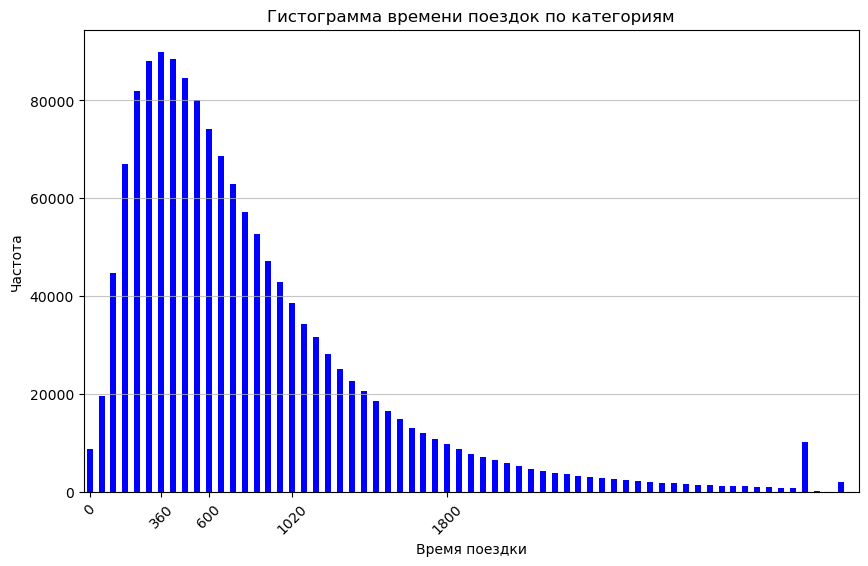

In [13]:
minute_bins = list(range(0, 3600, 60))
other_bins = [3600, 7200, 14400, 28800, 86400, 2592000]
bins = minute_bins + other_bins
train_data['duration_category'] = pd.cut(train_data['trip_duration'], bins=bins)
plt.figure(figsize=(10, 6))
train_data['duration_category'].value_counts().sort_index().plot(kind='bar', color='blue', alpha=1)
plt.title('Гистограмма времени поездок по категориям')
plt.xlabel('Время поездки')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
specific_bins = ['0','360', '600', '1020','1800']
#берём минуты
xticks_positions = [0, 6,10, 17,30]
plt.xticks(ticks=xticks_positions, labels=specific_bins, rotation=45)
train_data = train_data.drop(['duration_category'],axis = 1)
plt.show()



Получаем логнормальное распределение

Пик находится около 360 секунд или 6 минут

Есть много поездок, которые не продлились и минуты

Также странные вскоки на правой части графика

In [14]:
train_data[train_data['trip_duration'] > 86400]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282


Эти записи соответствуют поездкам продолжительностью более 24 часов. Эти значения немного невероятны

In [15]:
from datetime import datetime
from matplotlib.dates import DateFormatter
def plot_fun(column,color,bins):
        plt.figure(figsize=(10, 5))
        plt.hist(
            column,
            bins=bins,
            color = color,
            edgecolor="black"
        )


        plt.title(f"Распределение по столбцу: {column.name}")
        plt.xlabel("Дата")
        plt.ylabel("Количество")
        plt.xticks(rotation=45)

        date_format = DateFormatter("%B")
        plt.gca().xaxis.set_major_formatter(date_format)

        plt.show()

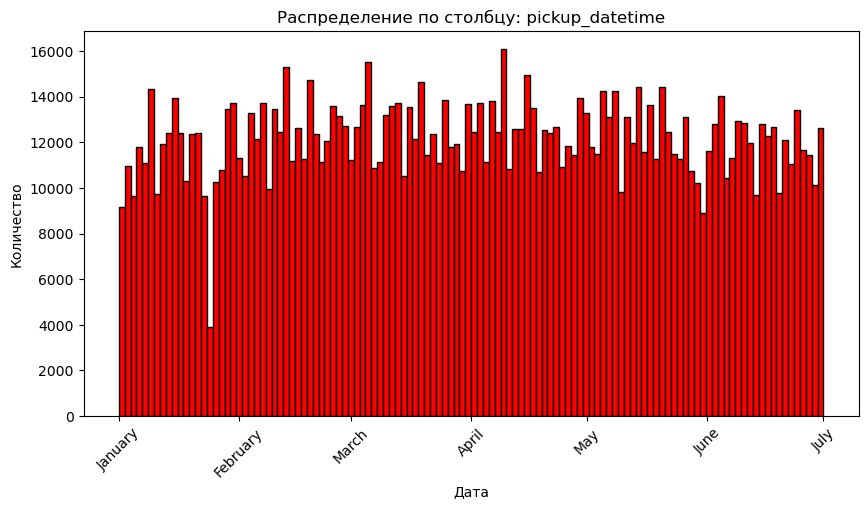

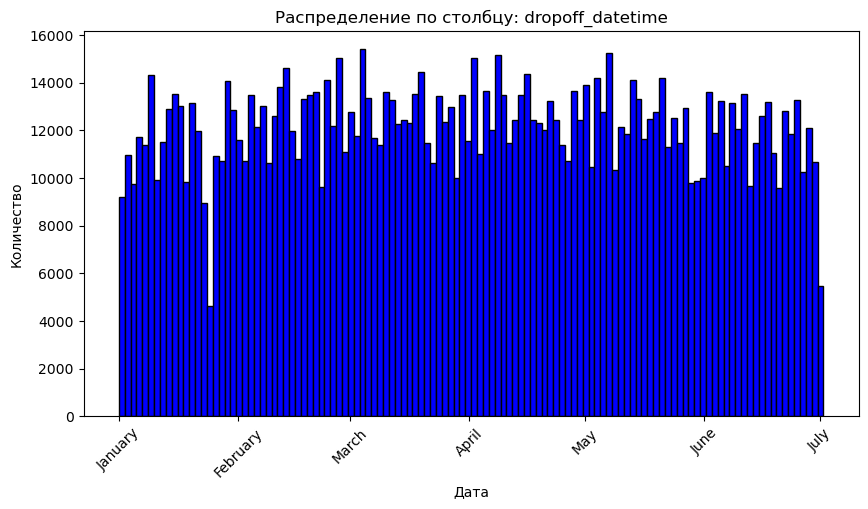

In [16]:
from datetime import datetime
from matplotlib.dates import DateFormatter

plot_fun(train_data['pickup_datetime'],'red',120)
plot_fun(train_data['dropoff_datetime'],'blue',120)

Однородно, охватывает полгода с января по июль 2016 года. Есть интересный спад в конце января — начале февраля.

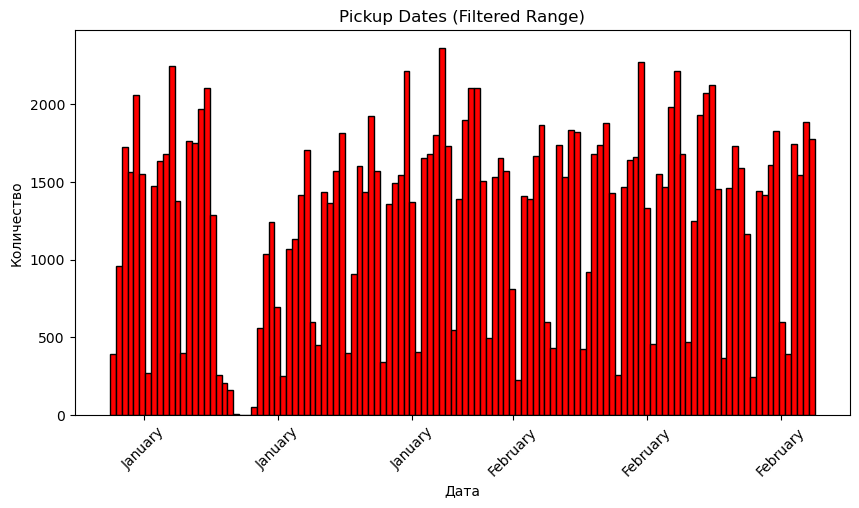

In [17]:
from datetime import datetime
from matplotlib.dates import DateFormatter
start_date = datetime(2016, 1, 20)
end_date = datetime(2016, 2, 10)
filtered_data = train_data[
    (train_data['pickup_datetime'] > start_date) &
    (train_data['pickup_datetime'] < end_date)
]


plt.figure(figsize=(10, 5))
plt.hist(
    filtered_data['pickup_datetime'],
    bins=120,
    color="red",
    edgecolor="black"
)


plt.title("Pickup Dates (Filtered Range)")
plt.xlabel("Дата")
plt.ylabel("Количество")
plt.xticks(rotation=45)


date_format = DateFormatter("%B")
plt.gca().xaxis.set_major_formatter(date_format)

plt.show()

Это зима в Нью-Йорке, так что, может быть, снежные бури или другие непогоды? Такие события следует учитывать

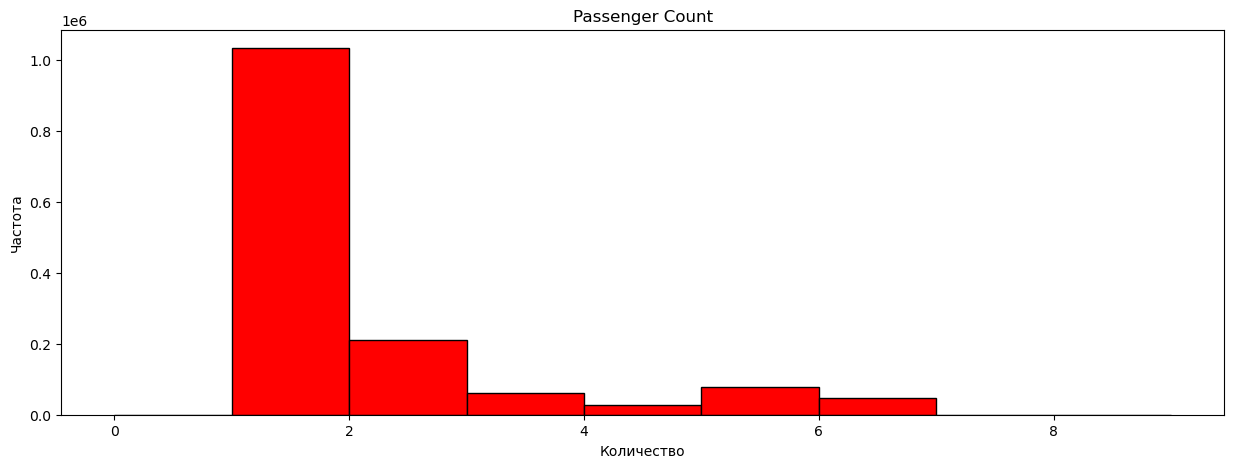

In [18]:
plt.figure(figsize=(15, 5))
plt.hist(
    train_data['passenger_count'],
    bins=9,
    color="red",
    edgecolor="black"
)


plt.title("Passenger Count")
plt.xlabel("Количество")
plt.ylabel("Частота")

plt.show()


Ещё было 60 случаев 0 пассажирами, три случая с 7, и по одному случаю с 8 и 9

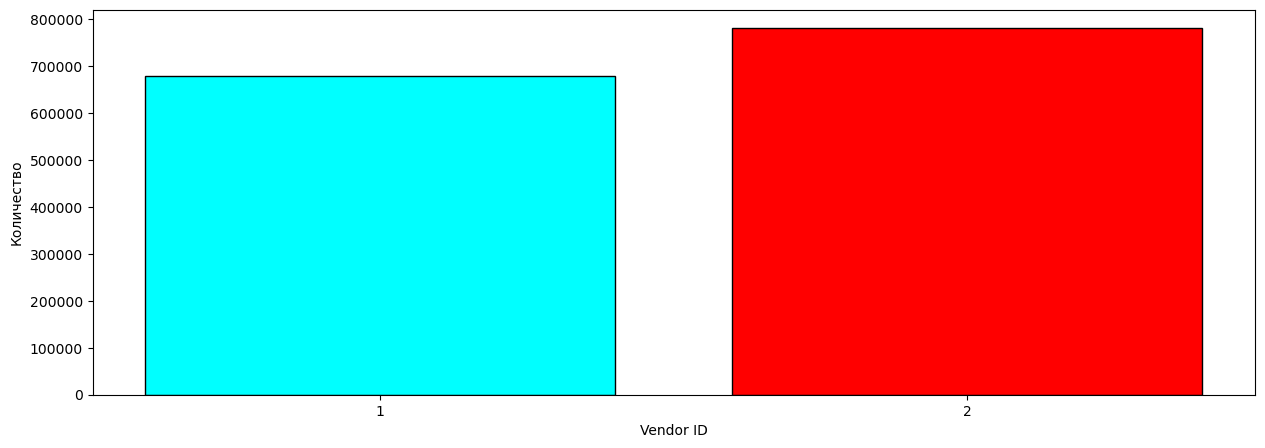

In [19]:
vendor_counts = train_data['vendor_id'].value_counts()


plt.figure(figsize=(15, 5))
colors = ['cyan' if vendor_id == 1 else 'red' for vendor_id in vendor_counts.index]

plt.bar(vendor_counts.index, vendor_counts.values, color=colors, edgecolor="black")


plt.xlabel("Vendor ID")
plt.ylabel("Количество")
plt.xticks([1, 2])

plt.show()

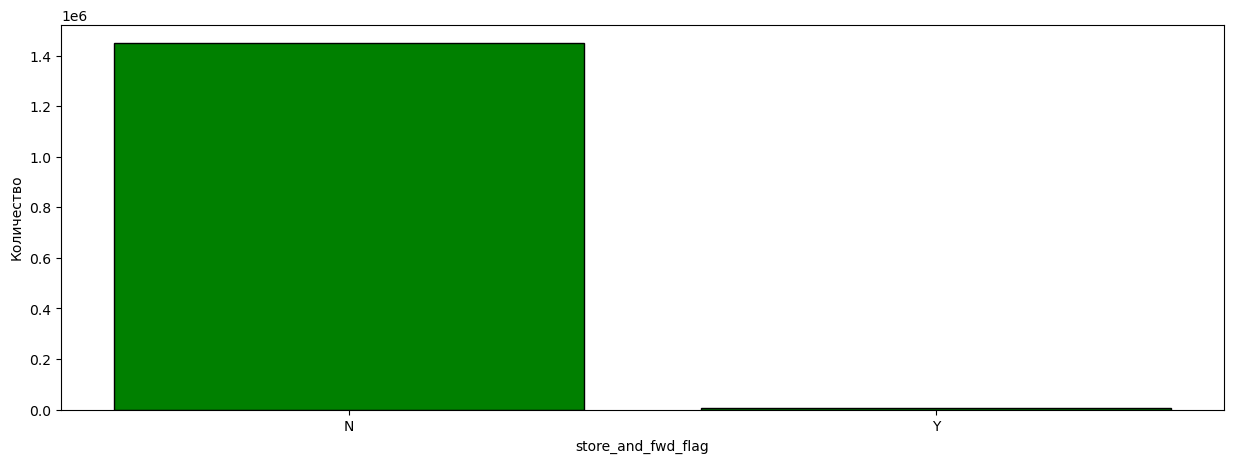

In [20]:
saff_counts = train_data['store_and_fwd_flag'].value_counts()

plt.figure(figsize=(15, 5))
plt.bar(saff_counts.index, saff_counts.values, color="green", edgecolor="black")


plt.xlabel("store_and_fwd_flag")
plt.ylabel("Количество")

plt.show()

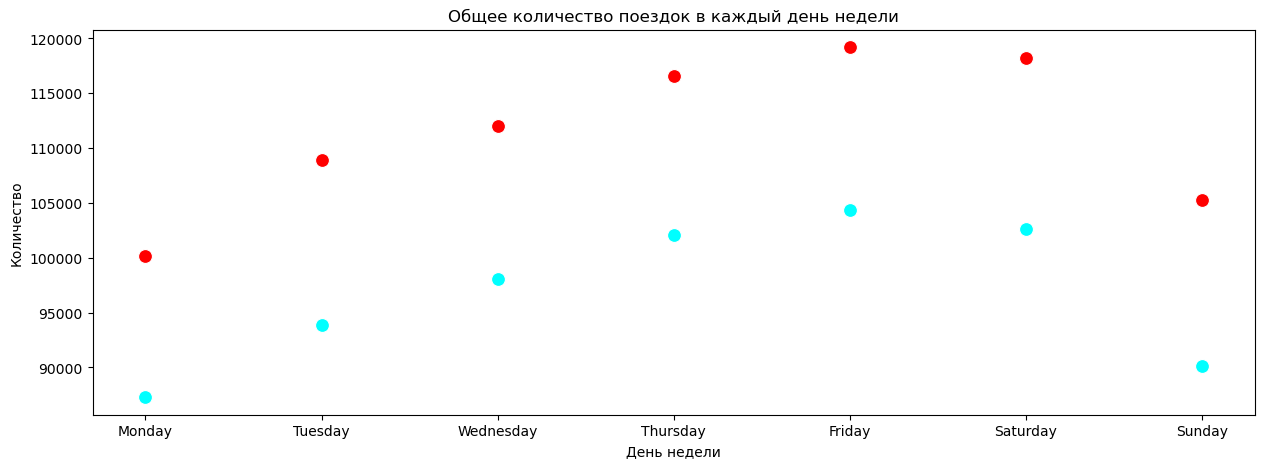

In [21]:
week1 = train_data[train_data['vendor_id'] == 1]['pickup_datetime'].dt.day_name()
week2 = train_data[train_data['vendor_id'] == 2]['pickup_datetime'].dt.day_name()


week1 = week1.value_counts().sort_index()
week2 = week2.value_counts().sort_index()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

week1 = week1.reindex(ordered_days, fill_value=0)
week2 = week2.reindex(ordered_days, fill_value=0)

plt.figure(figsize=(15, 5))
sns.scatterplot(x=week1.index, y=week1.values, s=100, color='cyan')
sns.scatterplot(x=week2.index, y=week2.values, s=100, color='red')


plt.title("Общее количество поездок в каждый день недели")
plt.xlabel("День недели")
plt.ylabel("Количество")


plt.show()

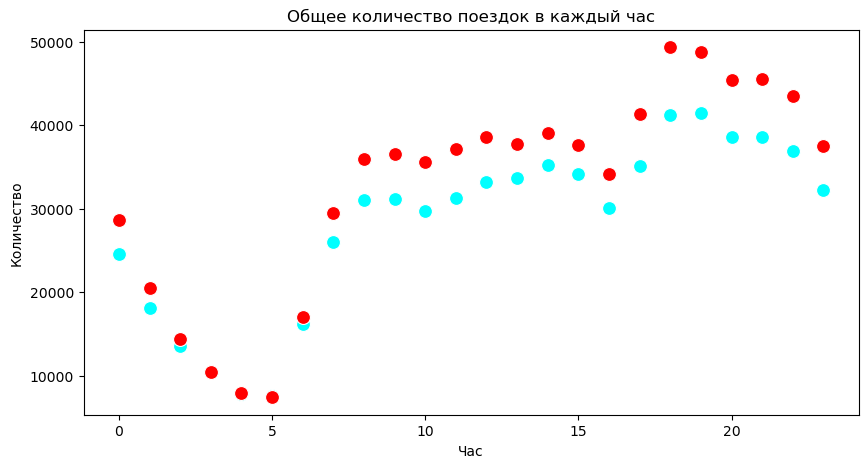

In [22]:
h1 = train_data[train_data['vendor_id'] == 1]['pickup_datetime'].dt.hour
h2 = train_data[train_data['vendor_id'] == 2]['pickup_datetime'].dt.hour


h1 = h1.value_counts().sort_index()
h2 = h2.value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=h1.index, y=h1.values, s=100, color='cyan')
sns.scatterplot(x=h2.index, y=h2.values, s=100, color='red')


plt.title("Общее количество поездок в каждый час")
plt.xlabel("Час")
plt.ylabel("Количество")


plt.show()

В подавляющем большинстве поездок был только один пассажир, а два пассажира были (далеко) вторым по популярности вариантом.

По мере увеличения числа пассажиров мы видим плавный спад от 3 до 4, пока большие толпы (и более крупные автомобили) не дадут нам еще один пик от 5 до 6 пассажиров.

У поставщика 2 значительно больше поездок в этом наборе данных, чем у поставщика 1. Это справедливо для каждого дня недели.

Мы обнаруживаем интересную закономерность: понедельник — самый тихий день, а пятница — очень загруженный. Это то же самое для двух разных поставщиков, при этом vendor_id == 2 показывает значительно более высокие числа поездок.

Как и следовало ожидать, в ранние утренние часы наблюдается сильный спад. Там мы также не видим большой разницы между двумя поставщиками. Мы обнаруживаем еще один спад около 4 часов вечера, а затем цифры увеличиваются к вечеру.

Значения store_and_fwd_flag, указывающие, были ли данные о поездке немедленно отправлены поставщику («N») или сохранены в памяти такси из-за отсутствия соединения с сервером («Y»), показывают, что сохранение практически не производилось:

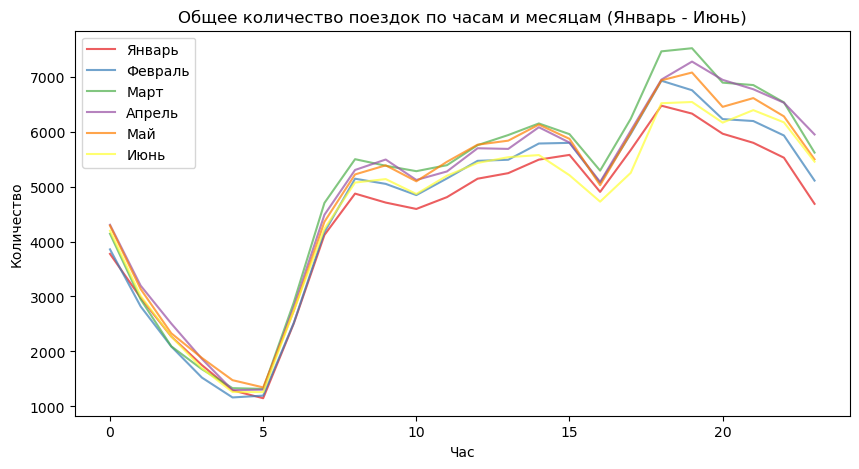

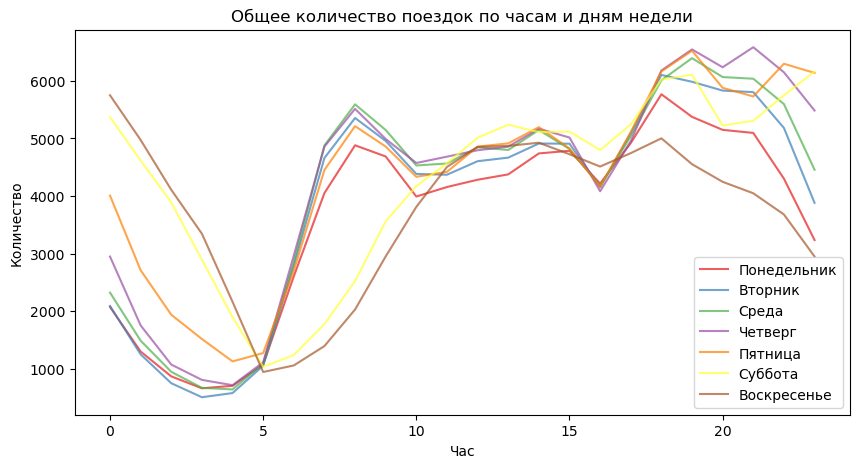

In [23]:
train_data['hour'] = train_data['pickup_datetime'].dt.hour
train_data['month'] = train_data['pickup_datetime'].dt.month


h1_monthly = train_data[train_data['vendor_id'] == 1].groupby(['month', 'hour']).size().unstack(fill_value=0)


colors = sns.color_palette("Set1", n_colors=6)
month_names = ["Январь", "Февраль", "Март", "Апрель", "Май", "Июнь"]

plt.figure(figsize=(10, 5))

for i, month in enumerate(range(1, 7)):
    if month in h1_monthly.index:
                plt.plot(h1_monthly.columns, h1_monthly.loc[month], color=colors[i], alpha=0.7, label=f'{month_names[i]}')



plt.title("Общее количество поездок по часам и месяцам (Январь - Июнь)")
plt.xlabel("Час")
plt.ylabel("Количество")
plt.legend()

plt.show()

train_data['hour'] = train_data['pickup_datetime'].dt.hour
train_data['day_of_week'] = train_data['pickup_datetime'].dt.dayofweek


h1_week = train_data[train_data['vendor_id'] == 1].groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)


colors = sns.color_palette("Set1", n_colors=7)
day_names = ["Понедельник", "Вторник", "Среда", "Четверг", "Пятница", "Суббота", "Воскресенье"]


plt.figure(figsize=(10, 5))

for i, day in enumerate(range(7)):
    if day in h1_week.index:
                plt.plot(h1_week.columns, h1_week.loc[day], color=colors[i], alpha=0.7, label=f'{day_names[i]}')



plt.title("Общее количество поездок по часам и дням недели")
plt.xlabel("Час")
plt.ylabel("Количество")
plt.legend()

plt.show()

train_data = train_data.drop(['hour','month','day_of_week'],axis=1)

В январе и июне меньше поездок, тогда как март и апрель — более загруженные месяцы. Эта тенденция наблюдается для обоих vendor_id.

В выходные (суббота и воскресенье, а также пятница в некоторой степени) число поездок выше в ранние утренние часы, но ниже утром между 5 и 10, что, скорее всего, можно объяснить контрастом между рабочими днями Нью-Йорка и ночной жизнью выходных. Кроме того, число поездок снижается в воскресенье вечером/ночью.

C:\Users\czvzxv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\czvzxv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\czvzxv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\czvzxv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

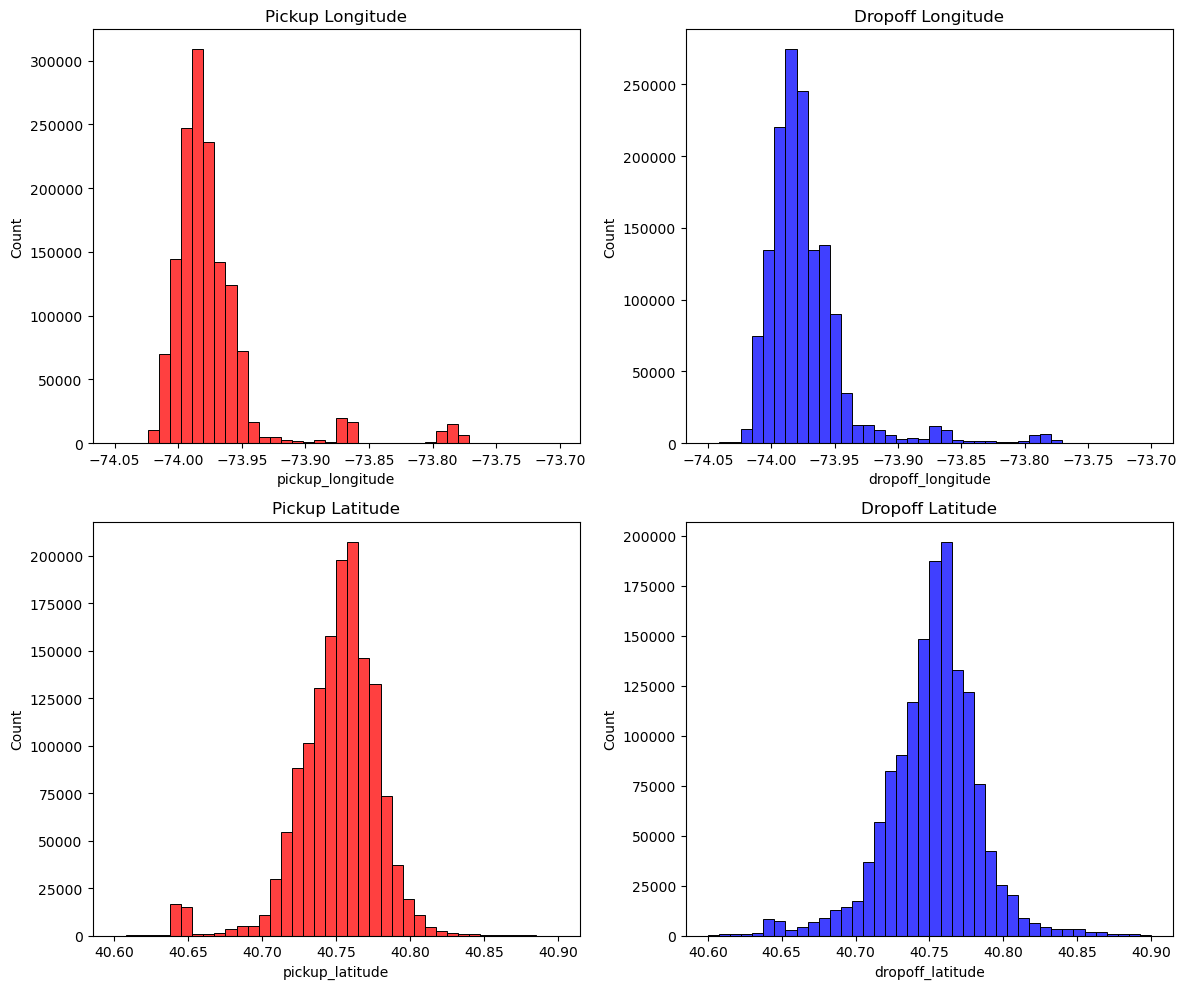

In [24]:
p1 = train_data[(train_data['pickup_longitude'] > -74.05) & (train_data['pickup_longitude'] < -73.7)]
p2 = train_data[(train_data['dropoff_longitude'] > -74.05) & (train_data['dropoff_longitude'] < -73.7)]
p3 = train_data[(train_data['pickup_latitude'] > 40.6) & (train_data['pickup_latitude'] < 40.9)]
p4 = train_data[(train_data['dropoff_latitude'] > 40.6) & (train_data['dropoff_latitude'] < 40.9)]


fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(p1['pickup_longitude'], bins=40, color="red", kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Pickup Longitude')

sns.histplot(p2['dropoff_longitude'], bins=40, color="blue", kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Dropoff Longitude')


sns.histplot(p3['pickup_latitude'], bins=40, color="red", kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Pickup Latitude')


sns.histplot(p4['dropoff_latitude'], bins=40, color="blue", kde=False, ax=axes[1, 1])
axes[1, 1].set_title('Dropoff Latitude')

plt.tight_layout()

plt.show()


Здесь мы ограничили диапазон значений широты и долготы, поскольку есть несколько случаев, которые находятся далеко за пределами границ Нью-Йорка. Полученные распределения соответствуют фокусу на Манхэттене, который мы уже видели на карте.

# Отношения между признаками

Как изменение количества поездок в течение дня и недели влияет на среднюю продолжительность поездки? ​

​Приводят ли более тихие дни и часы к более быстрым поездкам?

C:\Users\czvzxv\AppData\Local\Temp\ipykernel_13936\1599446619.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_trip_duration_weekday = train_data.groupby(['weekday', 'vendor_id'])['trip_duration_minutes'].median().reset_index()


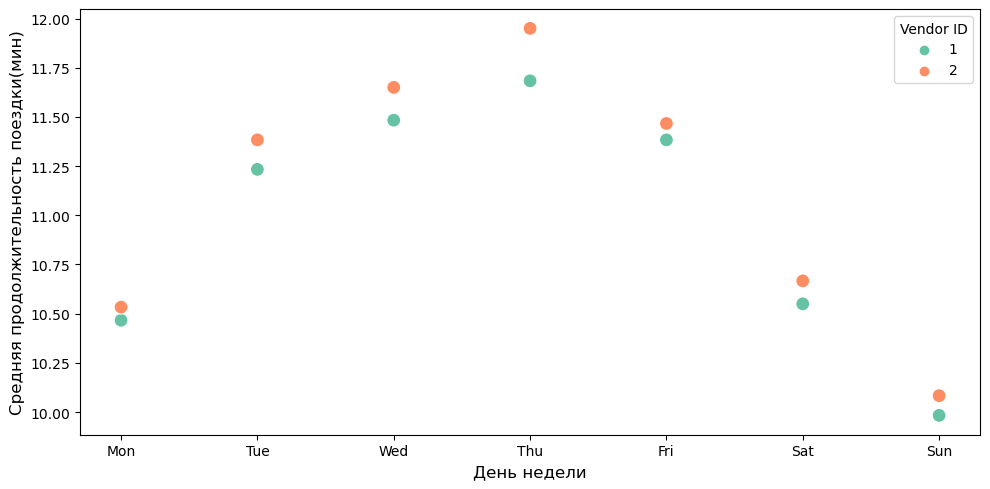

C:\Users\czvzxv\AppData\Local\Temp\ipykernel_13936\1599446619.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_data = train_data.groupby(['hpick', 'vendor_id'])['trip_duration'].median().reset_index()


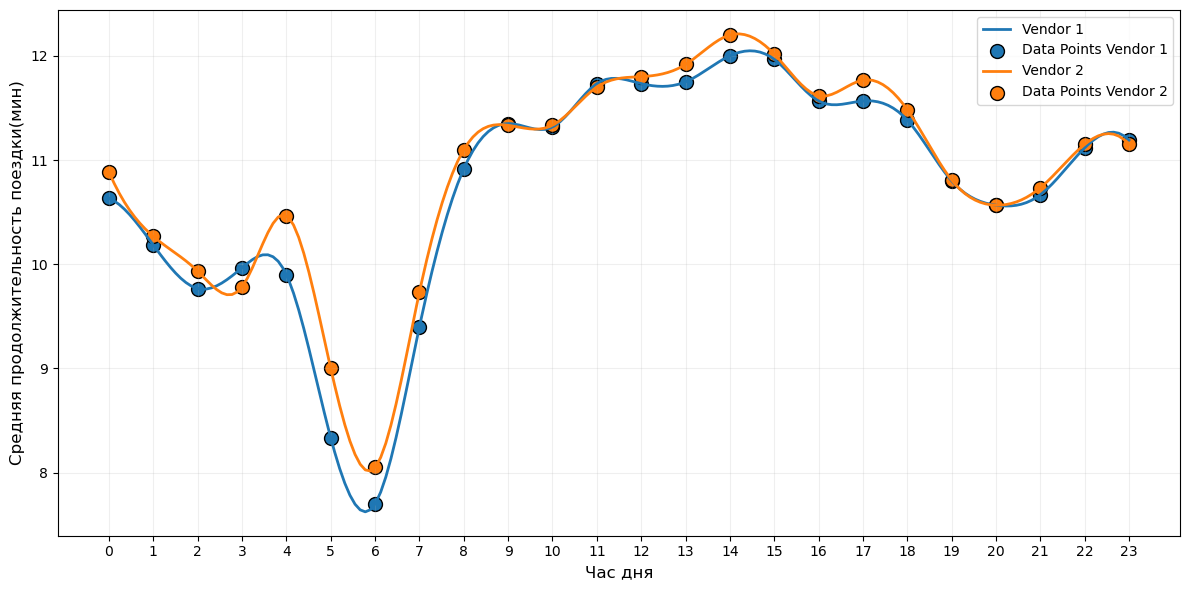

In [25]:
train_data['trip_duration_minutes'] = train_data['trip_duration'] / 60
train_data['weekday'] = train_data['pickup_datetime'].dt.dayofweek


median_trip_duration_weekday = train_data.groupby(['weekday', 'vendor_id'])['trip_duration_minutes'].median().reset_index()

weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
median_trip_duration_weekday['weekday'] = median_trip_duration_weekday['weekday'].map(weekday_map)

plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=median_trip_duration_weekday,
    x='weekday',
    y='trip_duration_minutes',
    hue='vendor_id',
    s=100,
    palette='Set2'
)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Средняя продолжительность поездки(мин)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Vendor ID', fontsize=10)


plt.tight_layout()
plt.show()

from scipy.interpolate import CubicSpline

train_data['hpick'] = train_data['pickup_datetime'].dt.hour


hourly_data = train_data.groupby(['hpick', 'vendor_id'])['trip_duration'].median().reset_index()
hourly_data['median_duration'] = hourly_data['trip_duration'] / 60


plt.figure(figsize=(12, 6))

for vendor_id in hourly_data['vendor_id'].unique():

    vendor_data = hourly_data[hourly_data['vendor_id'] == vendor_id]
    x = vendor_data['hpick']
    y = vendor_data['median_duration']


    cs = CubicSpline(x, y)
    x_smooth = np.linspace(x.min(), x.max(), 200)
    y_smooth = cs(x_smooth)


    plt.plot(x_smooth, y_smooth, label=f"Vendor {vendor_id}", linewidth=2)


    plt.scatter(x, y, label=f"Data Points Vendor {vendor_id}", s=100, edgecolor='black')

plt.xlabel("Час дня", fontsize=12)
plt.ylabel("Средняя продолжительность поездки(мин)", fontsize=12)
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=0.2)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()
train_data = train_data.drop(['trip_duration_minutes','weekday','hpick'],axis = 1)

Действительно, наблюдается аналогичная закономерность для бизнеса и дня недели. Поставщик 2, у которого поездки более частые, также имеет постоянно более высокую продолжительность поездок, чем поставщик 1. Стоит добавить функцию vendor_id в модель, чтобы проверить ее прогностическую значимость.

В течение типичного дня мы обнаруживаем пик в начале дня и спады около 5-6 утра и 8 вечера. Будний день и час поездки, по-видимому, являются важными характеристиками для прогнозирования ее продолжительности и должны быть включены в успешную модель.

Коррелируют ли различные количества пассажиров и/или различные поставщики с продолжительностью поездки?

C:\Users\czvzxv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1000x600 with 0 Axes>

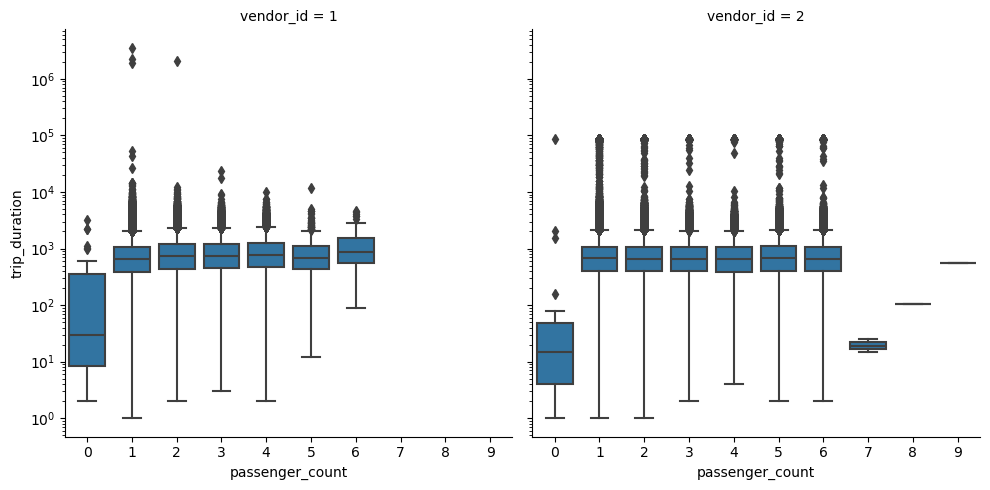

In [26]:
plt.figure(figsize=(10, 6))
g = sns.FacetGrid(train_data, col="vendor_id", height=5)
g.map(sns.boxplot, 'passenger_count', 'trip_duration', showfliers=True)
g.set(yscale='log')
plt.tight_layout()
plt.show()

У обоих поставщиков есть короткие поездки без пассажиров.

Между 1 и 6 пассажирами медианная продолжительность поездок удивительно похожа, в частности, у поставщика 2. У поставщика 1 могут быть различия, но они невелики

У поставщика 1 все поездки продолжительностью до 24 часов, тогда как у поставщика 2 все (пять) поездок с более чем шестью пассажирами и гораздо больше поездок, которые приближаются к 24-часовому пределу.

In [27]:
train_data.groupby('vendor_id')['trip_duration'].agg(['mean', 'median']).reset_index()

C:\Users\czvzxv\AppData\Local\Temp\ipykernel_13936\1635229926.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data.groupby('vendor_id')['trip_duration'].agg(['mean', 'median']).reset_index()


,vendor_id,mean,median
0,1,845.438244,658.0
1,2,1058.643164,666.0


Видим что медиана у них почти совпадает(прям как на boxplot). Но среднее значение смещено, скорее всего это из-за выбросов

Посмотрим store and forward flag для первого поставщика

C:\Users\czvzxv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1000x600 with 0 Axes>

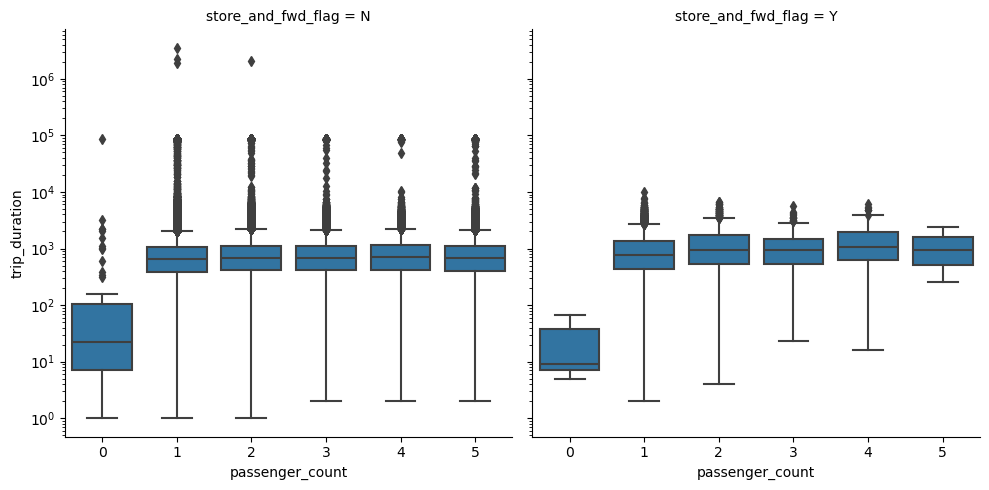

In [28]:
plt.figure(figsize=(10, 6))
g = sns.FacetGrid(train_data[train_data['passenger_count'] < 7], col="store_and_fwd_flag", height=5)
g.map(sns.boxplot, 'passenger_count', 'trip_duration', showfliers=True)
g.set(yscale='log')
plt.tight_layout()
plt.show()

Мы обнаружили, что нет никаких существенных различий между сохраненными и несохраненными поездками. Сохраненные могут быть немного длиннее, хотя и не включают ни одной из подозрительно длинных поездок.

# Feature engineering

Так, самая скучная часть закончилась и теперь можно подумать над тем, какие фичи мы можем извлечь из того, что у нас есть.

Первое, что приходит в голову, это получить расстояние из координат точки посадки и точки высадки, а далее посмотреть зависимость этого признака с продолжительностью поездки

Введём функцию нахождения расстояния между двумя точками

In [29]:
def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # Радиус Земли в километрах
    dlon = np.radians(lon2 - lon1)
    dlat = np.radians(lat2 - lat1)
    a = (np.sin(dlat / 2) ** 2 +
         np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

In [30]:
train_data['distance_km'] = haversine(
    train_data['pickup_longitude'].values,
    train_data['pickup_latitude'].values,
    train_data['dropoff_longitude'].values,
    train_data['dropoff_latitude'].values
)

combine_data['distance_km'] = haversine(
    combine_data['pickup_longitude'].values,
    combine_data['pickup_latitude'].values,
    combine_data['dropoff_longitude'].values,
    combine_data['dropoff_latitude'].values
)

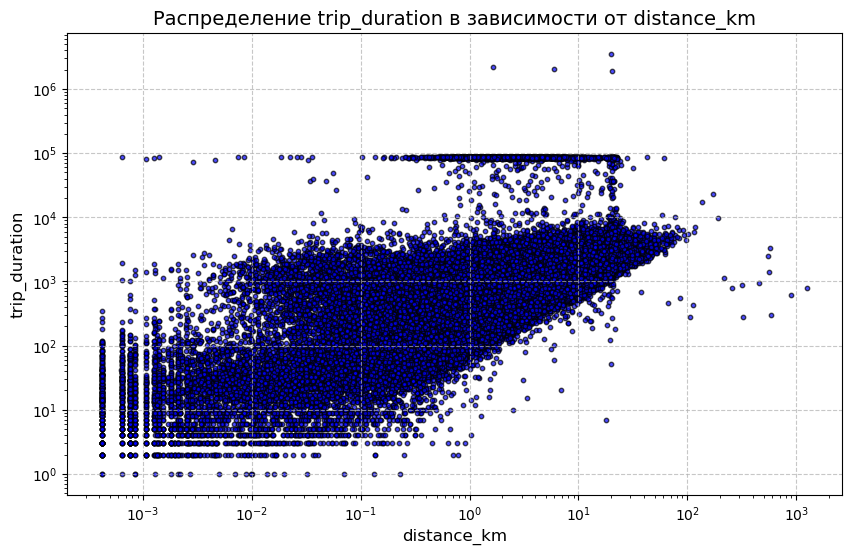

In [31]:
plt.figure(figsize=(10, 6))


plt.scatter(train_data['distance_km'], train_data['trip_duration'], alpha=0.7, c='blue', edgecolor='k', s=10)


plt.title(f'Распределение trip_duration в зависимости от distance_km', fontsize=14)
plt.xlabel('distance_km', fontsize=12)
plt.ylabel('trip_duration', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.grid(linestyle='--', alpha=0.7)

plt.show()

Какие выводы можно сделать:

Расстояние обычно увеличивается с увеличением trip_duration

Здесь 24-часовые поездки выглядят еще более подозрительно и с еще большей вероятностью являются артефактами в данных.

Кроме того, есть ряд поездок на очень короткие расстояния, до 1 метра, но с большим диапазоном кажущихся trip_durations

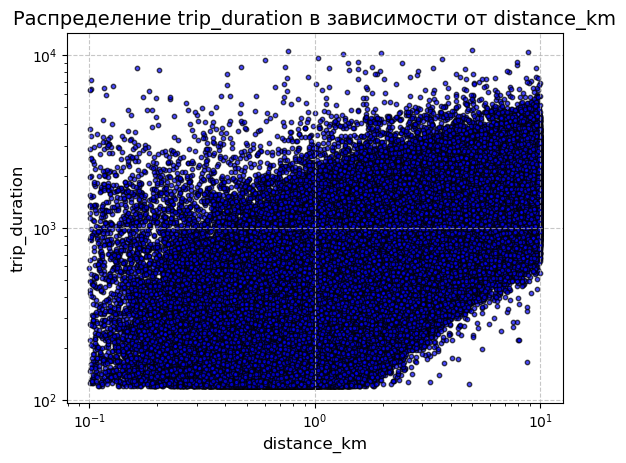

In [32]:
train_data_data = train_data[
    (train_data['trip_duration'] < 10800) &
    (train_data['trip_duration'] > 120) &
    (train_data['distance_km'] > 0.1) &
    (train_data['distance_km'] < 10)
]
filt = combine_data[
    (combine_data['trip_duration'] < 10800) & # 3 часа думаю нормальное ограничение для поездки обычной
    (combine_data['trip_duration'] > 120) &
    (combine_data['distance_km'] > 0.1) &
    (combine_data['distance_km'] < 10)
]

plt.scatter(train_data_data['distance_km'], train_data_data['trip_duration'], alpha=0.7, c='blue', edgecolor='k', s=10)


plt.title(f'Распределение trip_duration в зависимости от distance_km', fontsize=14)
plt.xlabel('distance_km', fontsize=12)
plt.ylabel('trip_duration', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.grid(linestyle='--', alpha=0.7)

plt.show()


Отфильтровали немного данные на экстремальные значения

Этот график показывает, что в логарифмическом пространстве trip_duration растет медленнее, чем линейно, для больших значений расстояния.

Так, с дистанцией закончили, теперь можно подумать насчёт скорости, ведь она тоже в кой-то мере влияет на длительность поездки. В тестовой выборки мы конечно не сможем её использовать, но она может помочь нам очистить часть данных

In [33]:
train_data['speed_kmh'] = train_data['distance_km'] / (train_data['trip_duration'] / 3600)

C:\Users\czvzxv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


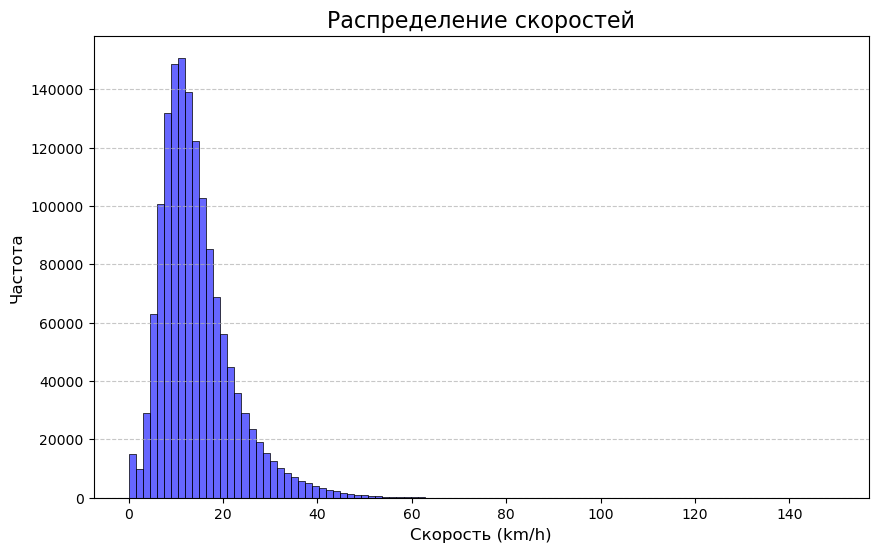

In [34]:
train_data = train_data[train_data['speed_kmh'] < 150]
plt.figure(figsize=(10, 6))
sns.histplot(train_data['speed_kmh'], bins=100, kde=False, color='blue', alpha=0.6)
plt.xlabel("Скорость (km/h)", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.title("Распределение скоростей", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Средняя скорость около 15 км/ч звучит, вероятно, разумно для Нью-Йорка. Все, что выше 50 км/ч, определенно требует волшебных машин (или поездок по шоссе). Также имейте в виду, что это относится к прямому расстоянию и что реальная скорость всегда была бы выше.

Также не стоит забывать разложить pickup_datetime на часы, месяц, день недели

In [35]:
combine_data['month'] = combine_data['pickup_datetime'].dt.month
combine_data['hour'] = combine_data['pickup_datetime'].dt.hour
combine_data['wday'] = combine_data['pickup_datetime'].dt.weekday

train_data['month'] = train_data['pickup_datetime'].dt.month
train_data['hour'] = train_data['pickup_datetime'].dt.hour
train_data['wday'] = train_data['pickup_datetime'].dt.weekday

Посмотрим зависимость величины скорости от часа дня и дня недели

C:\Users\czvzxv\AppData\Local\Temp\ipykernel_13936\782303140.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_speed_weekday = train_data.groupby(['wday', 'vendor_id'])['speed_kmh'].median().reset_index()


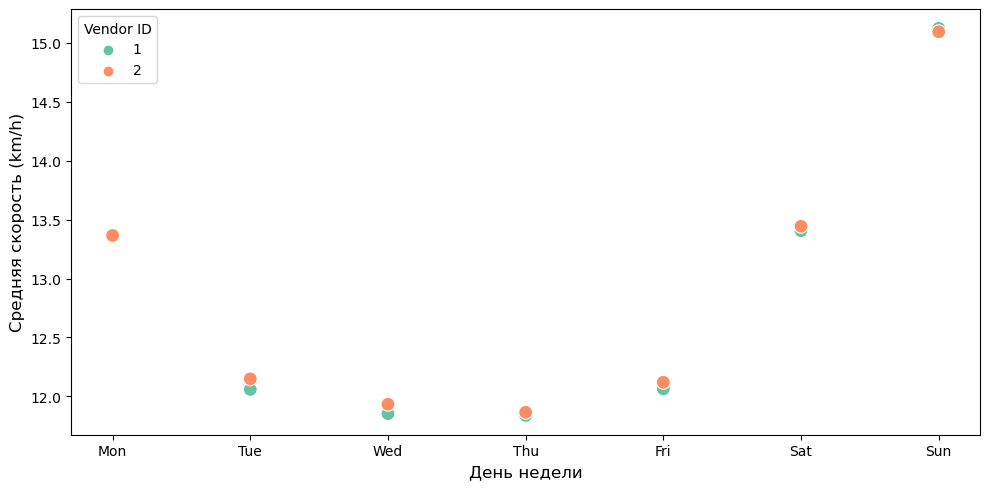

C:\Users\czvzxv\AppData\Local\Temp\ipykernel_13936\782303140.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_data = train_data.groupby(['hour', 'vendor_id'])['speed_kmh'].median().reset_index()


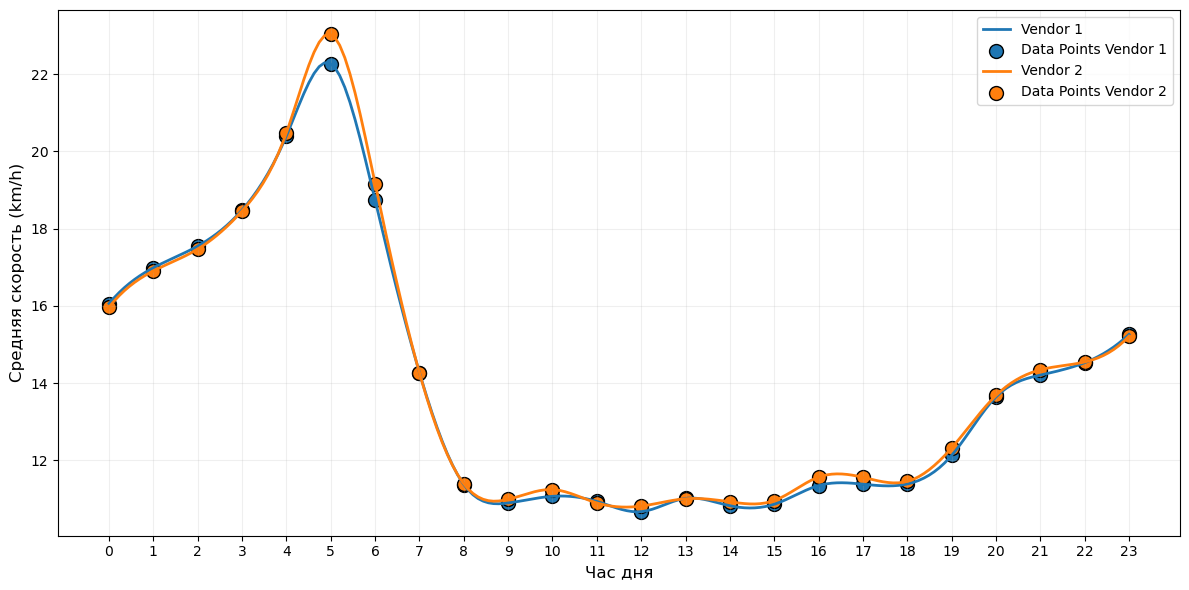

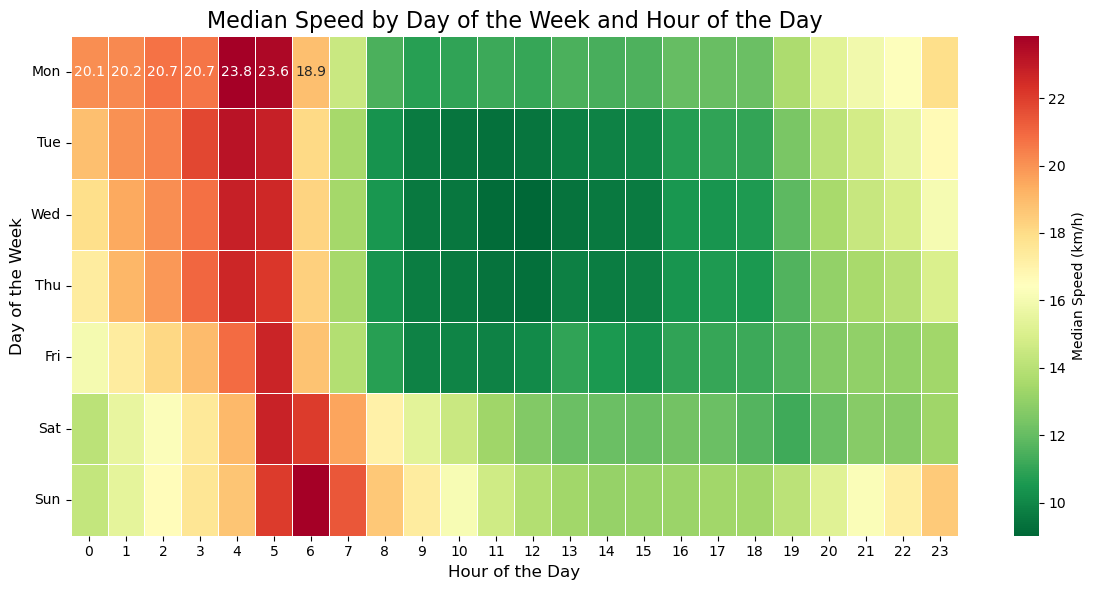

In [36]:
median_speed_weekday = train_data.groupby(['wday', 'vendor_id'])['speed_kmh'].median().reset_index()

weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
median_speed_weekday['wday'] = median_speed_weekday['wday'].map(weekday_map)

plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=median_speed_weekday,
    x='wday',
    y='speed_kmh',
    hue='vendor_id',
    s=100,
    palette='Set2'
)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Средняя скорость (km/h)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Vendor ID', fontsize=10)


plt.tight_layout()
plt.show()

hourly_data = train_data.groupby(['hour', 'vendor_id'])['speed_kmh'].median().reset_index()
hourly_data['median_speed'] = hourly_data['speed_kmh']


plt.figure(figsize=(12, 6))

for vendor_id in hourly_data['vendor_id'].unique():

    vendor_data = hourly_data[hourly_data['vendor_id'] == vendor_id]
    x = vendor_data['hour']
    y = vendor_data['median_speed']


    cs = CubicSpline(x, y)
    x_smooth = np.linspace(x.min(), x.max(), 200)
    y_smooth = cs(x_smooth)


    plt.plot(x_smooth, y_smooth, label=f"Vendor {vendor_id}", linewidth=2)


    plt.scatter(x, y, label=f"Data Points Vendor {vendor_id}", s=100, edgecolor='black')

plt.xlabel("Час дня", fontsize=12)
plt.ylabel("Средняя скорость (km/h)", fontsize=12)
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=0.2)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}


heatmap_data = train_data.groupby(['hour', 'wday'])['speed_kmh'].median().reset_index()


heatmap_data['wday'] = heatmap_data['wday'].map(weekday_map)


heatmap_pivot = heatmap_data.pivot(index='wday', columns='hour', values='speed_kmh')


weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
heatmap_pivot = heatmap_pivot.reindex(weekday_order)


plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_pivot,
    cmap='RdYlGn_r',
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={'label': 'Median Speed (km/h)'}
)

plt.title("Median Speed by Day of the Week and Hour of the Day", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Day of the Week", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

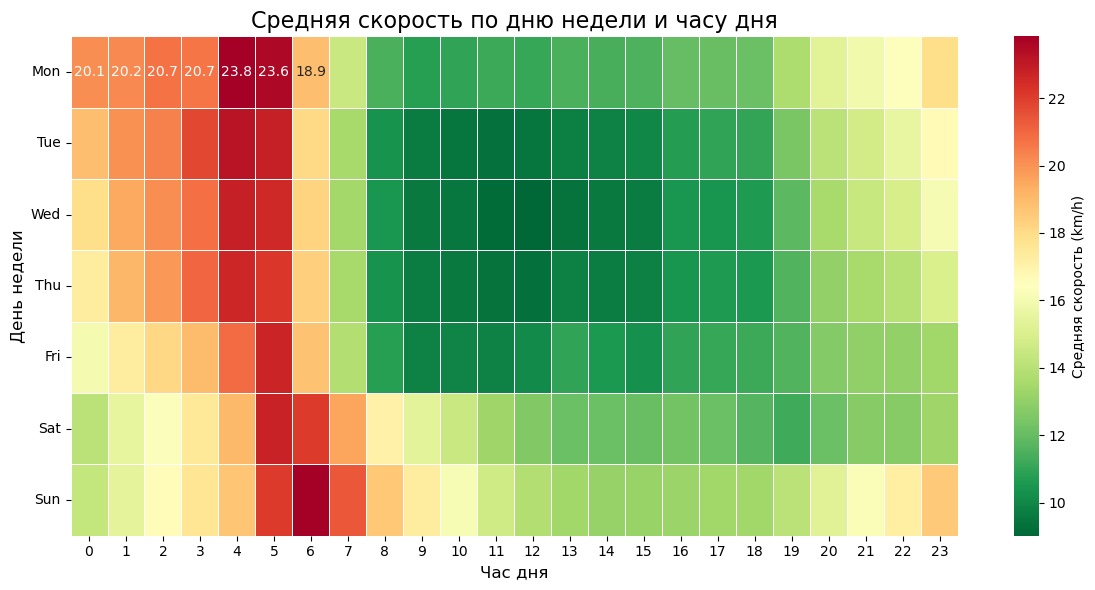

In [37]:
weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}


heatmap_data = train_data.groupby(['hour', 'wday'])['speed_kmh'].median().reset_index()


heatmap_data['wday'] = heatmap_data['wday'].map(weekday_map)


heatmap_pivot = heatmap_data.pivot(index='wday', columns='hour', values='speed_kmh')


weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
heatmap_pivot = heatmap_pivot.reindex(weekday_order)


plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_pivot,
    cmap='RdYlGn_r',
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={'label': 'Средняя скорость (km/h)'}
)

plt.title("Средняя скорость по дню недели и часу дня", fontsize=16)
plt.xlabel("Час дня", fontsize=12)
plt.ylabel("День недели", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

Такси, похоже, ездят быстрее в выходные и понедельник, чем в остальные дни недели.

Ранние утренние часы позволяют ехать быстрее, а все с 8 утра до 6 вечера — одинаково медленно.

Между двумя поставщиками почти нет различий.

Тепловая карта на нижней панели наглядно демонстрирует, как эти тенденции объединяются, создавая «зону низкой скорости» в середине дня и недели. На основе этого мы создаем новый признак, который показывает область с 8 утра до 6 вечера с понедельник по пятницу

In [38]:
train_data['low_speed_zone'] = np.where(
    (train_data['hour'] >= 8) & (train_data['hour'] < 18) & (train_data['wday'] >= 0) & (train_data['wday'] <= 4),
    1, 0
)
combine_data['low_speed_zone'] = np.where(
    (combine_data['hour'] >= 8) & (combine_data['hour'] < 18) & (combine_data['wday'] >= 0) & (combine_data['wday'] <= 4),
    1, 0
)

In [39]:
def calculate_bearing(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    x = np.sin(dlon) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(dlon)
    initial_bearing = np.arctan2(x, y)
    initial_bearing = np.degrees(initial_bearing)
    return (initial_bearing + 180) % 360 - 180

C:\Users\czvzxv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


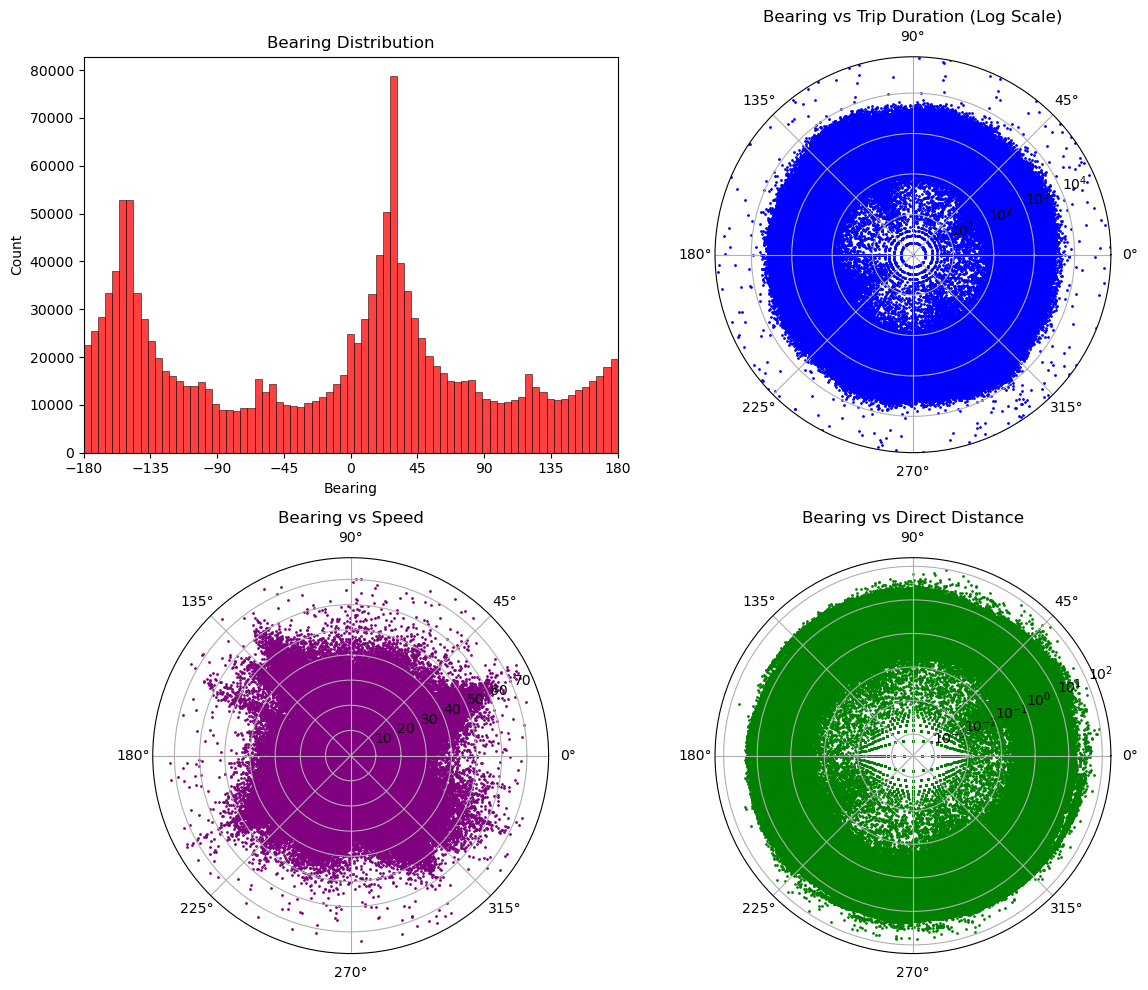

In [40]:
train_data['bearing'] = calculate_bearing(
    train_data['pickup_latitude'], train_data['pickup_longitude'],
    train_data['dropoff_latitude'], train_data['dropoff_longitude']
)
combine_data['bearing'] = calculate_bearing(
    combine_data['pickup_latitude'], combine_data['pickup_longitude'],
    combine_data['dropoff_latitude'], combine_data['dropoff_longitude']
)
train_data_filtered = train_data[train_data['distance_km'] < 100]
angles = np.radians(train_data_filtered['bearing'])


trip_filtered = train_data[(train_data['trip_duration'] < 3600*22) & (train_data['distance_km'] < 100)]
speed_filtered = train_data[(train_data['speed_kmh'] < 75) & (train_data['distance_km'] < 100)]


plt.figure(figsize=(12, 10))


plt.subplot(2, 2, 1)
sns.histplot(train_data_filtered['bearing'], bins=75, color='red')
plt.xlabel('Bearing')
plt.ylabel('Count')
plt.title('Bearing Distribution')
plt.xticks(np.arange(-180, 181, 45))
plt.xlim(-180, 180)


plt.subplot(2, 2, 2, projection='polar')
bearing_trip_duration = trip_filtered[['bearing', 'trip_duration']].dropna()
plt.scatter(np.deg2rad(bearing_trip_duration['bearing']), bearing_trip_duration['trip_duration'], color='blue', s=1)
plt.title('Bearing vs Trip Duration (Log Scale)')
plt.yscale('log')
plt.ylim(1, 3600 * 22)


plt.subplot(2, 2, 3, projection='polar')
bearing_speed = speed_filtered[['bearing', 'speed_kmh']].dropna()
plt.scatter(np.deg2rad(bearing_speed['bearing']), bearing_speed['speed_kmh'], color='purple', s=1)
plt.title('Bearing vs Speed')


plt.subplot(2, 2, 4, projection='polar')
bearing_distance = train_data_filtered[['bearing', 'distance_km']].dropna()
plt.scatter(np.deg2rad(bearing_distance['bearing']), bearing_distance['distance_km'], color='green', s=1)
plt.yscale('log')
plt.title('Bearing vs Direct Distance')

plt.tight_layout()
plt.show()

Направление пеленга имеет два заметных пика около 30 и -150 градусов. Интуитивно они могут быть связаны с ориентацией Манхэттена. Три или четыре меньших, менее острых пика видны между этими большими пиками.

Яркие «кольца», которые мы видим в расстоянии и длительности поездки, отражают знакомые пики распределения на логарифмической шкале.

С другой стороны, скорость показывает интересную кластерную структуру вдоль направлений пеленга. Зоны более высокой скорости можно определить на вышеупомянутых пиках пеленга, а также примерно перпендикулярно им (наиболее заметно около 125 градусов). Возможно, в этих данных мы видим сетку улиц Манхэттена.

Теперь можно подумать про расстояние до аэропорта. Поскольку аэропорты обычно находятся не в центре города, разумно предположить, что расстояние посадки/высадки от аэропорта может быть полезным предиктором для более длительных trip_durations.

In [41]:
jfk_coords = (40.6413, -73.7781)
lg_coords = (40.7769, -73.8740)
#координаты взяты с интернета

In [42]:
def calculate_distances(df):

    jfk_dist_pick = haversine(df['pickup_longitude'], df['pickup_latitude'],
                               jfk_coords[1], jfk_coords[0])
    jfk_dist_drop = haversine(df['dropoff_longitude'], df['dropoff_latitude'],
                               jfk_coords[1], jfk_coords[0])
    lg_dist_pick = haversine(df['pickup_longitude'], df['pickup_latitude'],
                              lg_coords[1], lg_coords[0])
    lg_dist_drop = haversine(df['dropoff_longitude'], df['dropoff_latitude'],
                              lg_coords[1], lg_coords[0])

    return jfk_dist_pick, jfk_dist_drop, lg_dist_pick, lg_dist_drop

In [43]:
train_data['jfk_dist_pick'], train_data['jfk_dist_drop'], train_data['lg_dist_pick'], train_data['lg_dist_drop'] = calculate_distances(train_data)
combine_data['jfk_dist_pick'], combine_data['jfk_dist_drop'], combine_data['lg_dist_pick'], combine_data['lg_dist_drop'] = calculate_distances(combine_data)

C:\Users\czvzxv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\czvzxv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\czvzxv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\czvzxv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

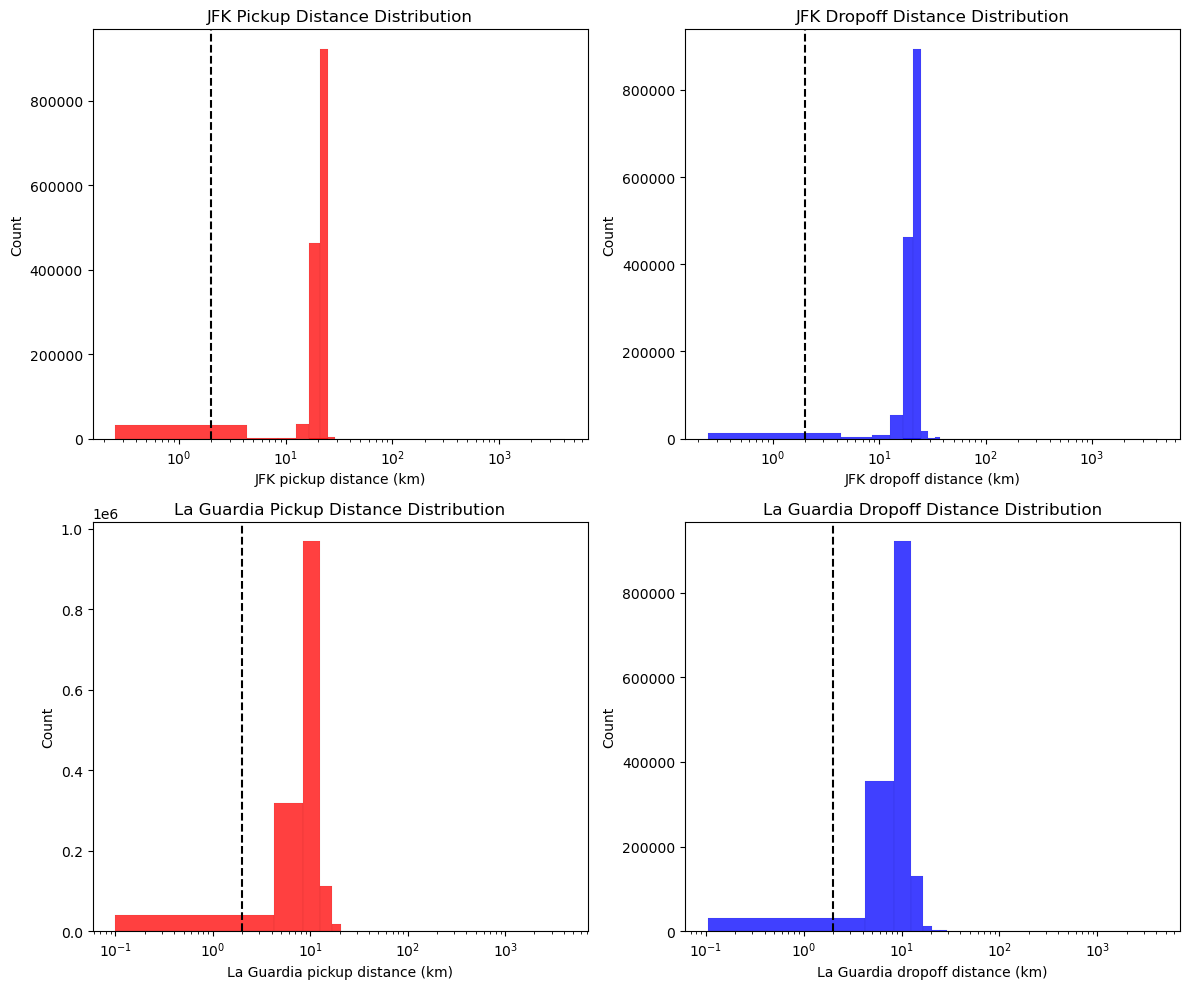

In [44]:
plt.figure(figsize=(12, 10))


plt.subplot(2, 2, 1)
sns.histplot(train_data['jfk_dist_pick'], bins=1000, color='red', stat='count')
plt.xscale('log')
plt.xlabel('JFK pickup distance (km)')
plt.title('JFK Pickup Distance Distribution')
plt.axvline(x=2, color='black', linestyle='--')


counts, bin_edges = np.histogram(train_data['jfk_dist_pick'], bins=1000)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
plt.bar(bin_centers, np.sqrt(counts), width=np.diff(bin_edges), align='center', color='red', alpha=0.6)


plt.subplot(2, 2, 2)
sns.histplot(train_data['jfk_dist_drop'], bins=1000, color='blue', stat='count')
plt.xscale('log')
plt.xlabel('JFK dropoff distance (km)')
plt.title('JFK Dropoff Distance Distribution')
plt.axvline(x=2, color='black', linestyle='--')


counts, bin_edges = np.histogram(train_data['jfk_dist_drop'], bins=1000)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
plt.bar(bin_centers, np.sqrt(counts), width=np.diff(bin_edges), align='center', color='blue', alpha=0.6)


plt.subplot(2, 2, 3)
sns.histplot(train_data['lg_dist_pick'], bins=1000, color='red', stat='count')
plt.xscale('log')
plt.xlabel('La Guardia pickup distance (km)')
plt.title('La Guardia Pickup Distance Distribution')
plt.axvline(x=2, color='black', linestyle='--')


counts, bin_edges = np.histogram(train_data['lg_dist_pick'], bins=1000)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
plt.bar(bin_centers, np.sqrt(counts), width=np.diff(bin_edges), align='center', color='red', alpha=0.6)


plt.subplot(2, 2, 4)
sns.histplot(train_data['lg_dist_drop'], bins=1000, color='blue', stat='count')
plt.xscale('log')
plt.xlabel('La Guardia dropoff distance (km)')
plt.title('La Guardia Dropoff Distance Distribution')
plt.axvline(x=2, color='black', linestyle='--')


counts, bin_edges = np.histogram(train_data['lg_dist_drop'], bins=1000)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
plt.bar(bin_centers, np.sqrt(counts), width=np.diff(bin_edges), align='center', color='blue', alpha=0.6)

plt.tight_layout()
plt.show()

На основании этих цифр мы можем определить поездку в аэропорт Кеннеди/Ла-Гуардиа как поездку с местом посадки или высадки менее чем в 2 км от соответствующего аэропорта.

In [45]:
train_data['jfk_trip'] = ((train_data['jfk_dist_pick'] < 2) | (train_data['jfk_dist_drop'] < 2)).astype(int)
train_data['lg_trip'] = ((train_data['lg_dist_pick'] < 2) | (train_data['lg_dist_drop'] < 2)).astype(int)
combine_data['jfk_trip'] = ((combine_data['jfk_dist_pick'] < 2) | (combine_data['jfk_dist_drop'] < 2)).astype(int)
combine_data['lg_trip'] = ((combine_data['lg_dist_pick'] < 2) | (combine_data['lg_dist_drop'] < 2)).astype(int)

Какова продолжительность этих поездок?

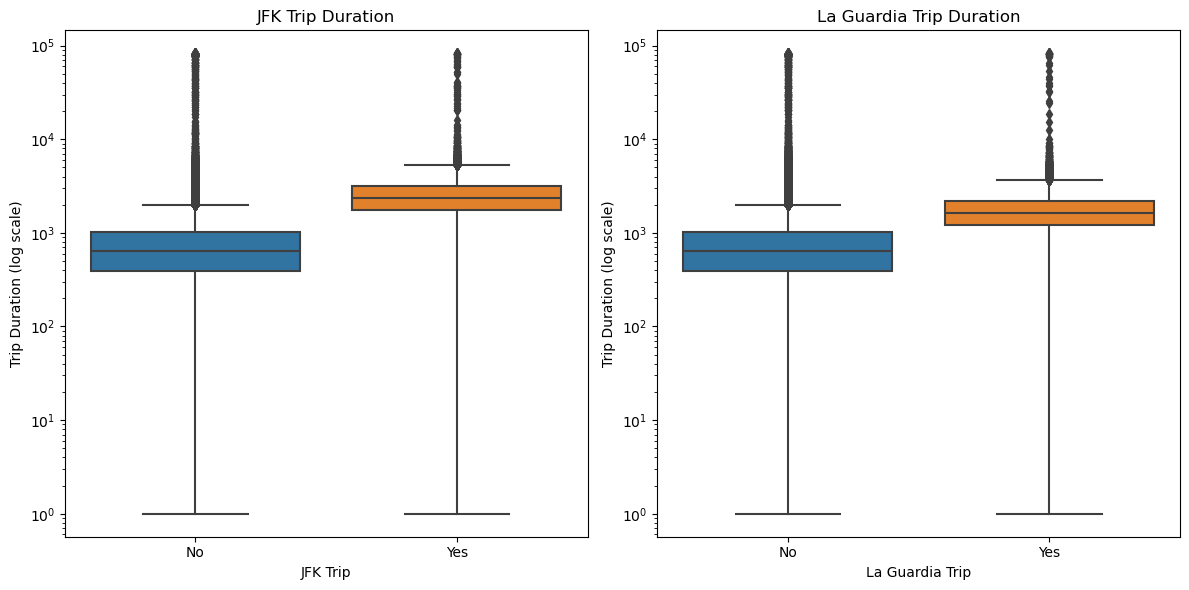

In [46]:
filtered_train_data = train_data[train_data['trip_duration'] < 23 * 3600]


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='jfk_trip', y='trip_duration', data=filtered_train_data)
plt.yscale('log')
plt.title('JFK Trip Duration')
plt.xlabel('JFK Trip')
plt.ylabel('Trip Duration (log scale)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])


plt.subplot(1, 2, 2)
sns.boxplot(x='lg_trip', y='trip_duration', data=filtered_train_data)
plt.yscale('log')
plt.title('La Guardia Trip Duration')
plt.xlabel('La Guardia Trip')
plt.ylabel('Trip Duration (log scale)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

Мы обнаружили, что наша гипотеза была верна и что поездки в аэропорт, в частности в более отдаленный JFK, имеют значительно более длительные средние trip_durations. Эти две особенности определенно должны быть частью нашей модели.

Давайте ещё добавим критерий наличия метели, ведь она тоже влияет на поездку

In [47]:
train_data['blizzard'] = (~((train_data['pickup_datetime'].dt.date < pd.to_datetime("2016-01-22").date()) | (train_data['pickup_datetime'].dt.date > pd.to_datetime("2016-01-29").date()))).astype(int)

Конечно не забудем всё то же самое добавить в combine_data

In [48]:
combine_data['jfk_dist_pick'], combine_data['jfk_dist_drop'], combine_data['lg_dist_pick'], combine_data['lg_dist_drop'] = calculate_distances(combine_data)
combine_data['blizzard'] = (~((combine_data['pickup_datetime'].dt.date < pd.to_datetime("2016-01-22").date()) | (combine_data['pickup_datetime'].dt.date > pd.to_datetime("2016-01-29").date()))).astype(int)

# Очистка данных

Какие данные нужно посмотреть и в худшем случае удалить?

Поездки длиннее дня



In [49]:
train_data[train_data['trip_duration'] > 24*3600]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,wday,low_speed_zone,bearing,jfk_dist_pick,jfk_dist_drop,lg_dist_pick,lg_dist_drop,jfk_trip,lg_trip,blizzard
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,...,1,0,-44.316302,1.006350,21.015607,16.443366,6.985956,1,0,0
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,...,5,0,-62.618646,15.990284,21.854537,6.129661,9.514494,0,0,0
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,...,1,0,-174.969924,20.662180,19.951113,10.014267,10.869823,0,0,0
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,...,5,0,-55.358997,0.951088,20.770766,16.158242,9.269971,1,0,0


Избавимся от этих данных


In [50]:
train_data = train_data[train_data['trip_duration'] < 24*3600]


Теперь стоит рассмотреть поездки около 24 часов, допустим с 22 до 24 часов. Используя карту из начала ноутбука, можно также посмотреть точки высадки и убедиться в том, что большинство поездок находятся внутри Манхэттена либо поездка идёт оттуда в аэропорт или наоборот

In [51]:
train_data[(train_data['trip_duration'] < 24*3600) & (train_data['trip_duration'] > 22*3600)].sort_values(by = 'distance_km')[['distance_km', 'speed_kmh']]

,distance_km,speed_kmh
168983,0.000000,0.000000
120183,0.000000,0.000000
822586,0.000643,0.000027
780672,0.001065,0.000047
551398,0.001273,0.000055
...,...,...
652867,22.733118,0.958900
1327210,22.782356,0.998569
1259412,28.084474,1.188034
1097636,42.353672,1.776497


Я не думаю что вероятна поездка на 60км со скорость 2км/ч. Это просто невероятно, даже при апокалипсисе, аналогично с другими поездками

Удалим все поездки длиной более 22 часов

In [52]:
train_data = train_data[train_data['trip_duration'] < 22*3600]


Теперь стоит обратить внимание на поездки, которые короче нескольких минут

In [53]:
train_data[train_data['trip_duration'] < 5*60].shape[0]

220404

Довольно много поездок, сопоставим скорость и длительность. Но для начала проверим сколько поездок с длиной вблизи 0

In [54]:
train_data[np.isclose(train_data['distance_km'], 0)].shape[0]

5895

In [55]:
train_data[np.isclose(train_data['distance_km'], 0)].sort_values(by = 'trip_duration')[['distance_km','trip_duration']]

,distance_km,trip_duration
1063496,0.0,1
767271,0.0,1
1125014,0.0,1
346959,0.0,1
610159,0.0,1
...,...,...
819760,0.0,4578
457033,0.0,4579
149352,0.0,4683
607368,0.0,5929


У нас есть некоторые вариантов где trip_duration > 3600, то есть больше часа и при этом машина считай не двигалась. Такие значения точно не стоит учитывать

Давайте построим распределение с маленьким расстояним, взяв то, что trip_duration в таком случае не может быть грубо говоря дольше 100 минут

C:\Users\czvzxv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\czvzxv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\czvzxv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


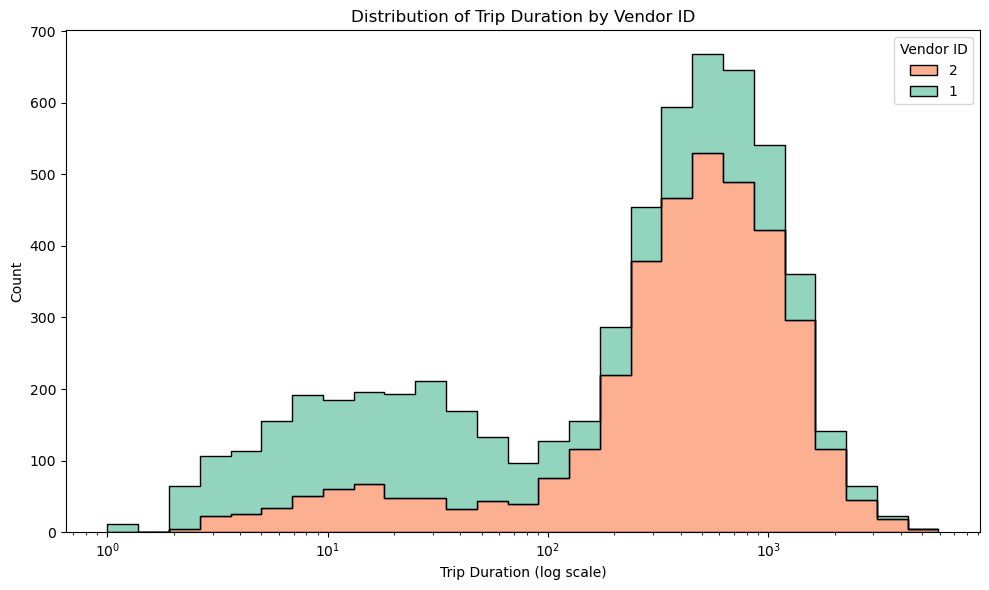

In [56]:
filtered_data = train_data[(train_data['trip_duration'] < 6000) & (np.isclose(train_data['distance_km'], 0))]


plt.figure(figsize=(10, 6))
sns.histplot(
    data=filtered_data,
    x='trip_duration',
    hue='vendor_id',
    log_scale=(True, False), 
    palette='Set2',
    multiple='stack',
    element = 'step',
    alpha = 0.7
)


plt.xscale('log')
plt.xlabel('Trip Duration (log scale)')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration by Vendor ID')
plt.legend(title='Vendor ID', labels=filtered_data['vendor_id'].unique())

plt.tight_layout()
plt.show()

Стоит отметить, что большинство поездок в группе «менее минуты» были от поставщика 1, тогда как группа «10 минут» в основном состоит из такси поставщика 2

Поездки длительностью около 15 минут (900 с) без преодоления какого-либо расстояния кажутся вряд ли возможными. Если только они не связаны с пробками, но кто садится в такси, застрявшее в пробке?

Удалим поездки с почти нулевым расстоянием, которые заняли больше минуты, для нашего дальнейшего анализа.

In [57]:
train_data = train_data[(train_data['distance_km'] > 0) | ((np.isclose(train_data['distance_km'], 0) & (train_data['trip_duration'] < 60)))]


После исключения поездок на нулевое расстояние остаются короткие поездки с самой высокой средней скоростью:

In [58]:
train_data[(train_data['trip_duration'] < 5*60) & (train_data['distance_km'] > 0) ].sort_values(by = 'speed_kmh')[['trip_duration','distance_km','speed_kmh']]

,trip_duration,distance_km,speed_kmh
1396554,266,0.000424,0.005741
1452268,233,0.000424,0.006554
589192,183,0.000424,0.008344
501598,236,0.000642,0.009795
128244,242,0.000769,0.011444
...,...,...,...
803844,17,0.680954,144.202082
313032,6,0.240743,144.445557
848976,4,0.162147,145.932460
182695,79,3.210060,146.281205


Наблюдаем такую ситуацию, что машина проехала допустим 160 метров за 4 секунды со скорость 149км/ч. Даже если вспомнить культовое кино "такси", сложно это представить

Давайте установим нижний предел для trip_duration в 10 секунд хотя бы и довольно скучном ограничении скорости до 100 км/ч

In [59]:
train_data = train_data[(train_data['trip_duration'] > 10) & (train_data['speed_kmh'] < 100 )]
combine_data['speed_kmh'] = combine_data['distance_km'] / (combine_data['trip_duration'] / 3600) # забыл сделать эту фичу для комбайна(потом всё равно удалять, не думал что пригодится)


Проверим поездки прям далеко отдалённые, можно отдалить от аэропорта

In [60]:
train_data[(train_data['jfk_dist_pick'] > 300) | (train_data['jfk_dist_drop'] > 300)][['jfk_dist_pick','jfk_dist_drop','distance_km','trip_duration','speed_kmh']]

,jfk_dist_pick,jfk_dist_drop,distance_km,trip_duration,speed_kmh
1068810,4124.132919,4124.137929,0.02180,1105,0.071024
1184454,4124.138513,4124.130330,0.01481,499,0.106849


У нас есть например 2 значения только, в 4124 км от аэропорта, это явно уже другие штаты. Исключим эти данные

In [61]:
train_data = train_data[(train_data['jfk_dist_pick'] < 300) & (train_data['jfk_dist_drop'] < 300)]

In [62]:
train_data = train_data[
    (train_data['trip_duration'] < 22 * 3600) &
    ((train_data['distance_km'] > 0) | ((train_data['distance_km'].abs() < 1e-6) & (train_data['trip_duration'] < 60))) &
    (train_data['jfk_dist_pick'] < 300) &
    (train_data['jfk_dist_drop'] < 300) &
    (train_data['trip_duration'] > 10) &
    (train_data['speed_kmh'] < 100)
]


In [63]:
train_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,wday,low_speed_zone,bearing,jfk_dist_pick,jfk_dist_drop,lg_dist_pick,lg_dist_drop,jfk_trip,lg_trip,blizzard
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,1,99.970196,22.229501,20.935109,9.161980,7.734707,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,0,-117.153768,20.197536,21.172074,9.925166,11.730014,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,-159.680165,21.744996,20.632960,8.961118,13.327090,0,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2,0,-172.737700,21.425561,21.045337,13.092073,14.021187,0,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5,0,179.473585,23.564407,22.720601,8.534462,8.352725,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,4,1,-119.059338,20.746115,21.331123,9.758112,10.972399,0,0,0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,6,0,25.342196,22.183540,23.665552,11.184208,8.387350,0,0,0
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,4,0,-150.788492,20.829137,20.452411,7.224984,13.435862,0,0,0
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,1,1,35.033294,20.959724,20.983773,9.614423,8.755954,0,0,0


In [64]:
combine_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,low_speed_zone,bearing,jfk_dist_pick,jfk_dist_drop,lg_dist_pick,lg_dist_drop,jfk_trip,lg_trip,blizzard,speed_kmh
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,1,99.970196,22.229501,20.935109,9.161980,7.734707,0,0,0,11.856428
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0,-117.153768,20.197536,21.172074,9.925166,11.730014,0,0,0,9.803659
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,-159.680165,21.744996,20.632960,8.961118,13.327090,0,0,0,10.822201
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,0,-172.737700,21.425561,21.045337,13.092073,14.021187,0,0,0,12.465721
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,0,179.473585,23.564407,22.720601,8.534462,8.352725,0,0,0,9.836594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,NaT,1,-74.003464,40.725105,-74.001251,40.733643,N,...,0,11.110268,21.164980,21.434760,12.332884,11.748255,0,0,0,NaN
625130,id3700764,1,2016-01-01 00:01:52,NaT,1,-74.006363,40.743782,-73.953407,40.782467,N,...,0,46.018484,22.365638,21.557448,11.740650,6.714668,0,0,0,NaN
625131,id2568735,1,2016-01-01 00:01:24,NaT,2,-73.972267,40.759865,-73.876602,40.748665,N,...,0,98.754367,21.017444,14.542678,8.489502,3.147245,0,0,0,NaN
625132,id1384355,1,2016-01-01 00:00:28,NaT,1,-73.976501,40.733562,-73.854263,40.891788,N,...,0,30.275237,19.623790,28.582059,9.887568,12.882475,0,0,0,NaN


# Внешние данные

## Погодные данные

Рассмотрим данные о погоде, собранные Национальной метеорологической службой. Они содержат данные за первые шесть месяцев 2016 года для метеостанции в Центральном парке. Они содержат для каждого дня минимальную температуру, максимальную температуру, среднюю температуру, осадки, новый снегопад и текущую глубину снега. Температура измеряется в градусах Фаренгейта, а глубина измеряется в дюймах. T означает, что есть следы осадков.

In [65]:
train_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,wday,low_speed_zone,bearing,jfk_dist_pick,jfk_dist_drop,lg_dist_pick,lg_dist_drop,jfk_trip,lg_trip,blizzard
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,1,99.970196,22.229501,20.935109,9.161980,7.734707,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,0,-117.153768,20.197536,21.172074,9.925166,11.730014,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,-159.680165,21.744996,20.632960,8.961118,13.327090,0,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2,0,-172.737700,21.425561,21.045337,13.092073,14.021187,0,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5,0,179.473585,23.564407,22.720601,8.534462,8.352725,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,4,1,-119.059338,20.746115,21.331123,9.758112,10.972399,0,0,0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,6,0,25.342196,22.183540,23.665552,11.184208,8.387350,0,0,0
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,4,0,-150.788492,20.829137,20.452411,7.224984,13.435862,0,0,0
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,1,1,35.033294,20.959724,20.983773,9.614423,8.755954,0,0,0


In [66]:
weather_table = pd.read_csv("C:/Users/czvzxv/Desktop/Такси/weather_data_nyc.csv")

In [67]:
weather_table

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0
...,...,...,...,...,...,...,...
361,27-12-2016,60,40,50.0,0,0,0
362,28-12-2016,40,34,37.0,0,0,0
363,29-12-2016,46,33,39.5,0.39,0,0
364,30-12-2016,40,33,36.5,0.01,T,0


Преобразим в datetime формат дату

In [68]:
weather_table['date'] = pd.to_datetime(weather_table['date'],format='%d-%m-%Y')
weather_table.rename(columns={'date': 'pickup_datetime'},inplace = True)

In [69]:
weather_table['precipitation'] = weather_table['precipitation'].replace('T', 0.01).astype(float)
weather_table['snow fall'] = weather_table['snow fall'].replace('T', 0.01).astype(float)
weather_table['snow depth'] = weather_table['snow depth'].replace('T', 0.01).astype(float)

weather_table['rain'] = weather_table['precipitation']
weather_table['s_fall'] = weather_table['snow fall']
weather_table['s_depth'] = weather_table['snow depth']
weather_table['all_precip'] = weather_table['s_fall'] + weather_table['rain']
weather_table['has_snow'] = ((weather_table['s_fall'] > 0) | (weather_table['s_depth'] > 0)).astype(int)
weather_table['has_rain'] = (weather_table['rain'] > 0).astype(int)

weather_table.rename(columns={
    'maximum temperature': 'max_temp',
    'minimum temperature': 'min_temp'
}, inplace=True)

In [70]:
weather_table

,pickup_datetime,max_temp,min_temp,average temperature,precipitation,snow fall,snow depth,rain,s_fall,s_depth,all_precip,has_snow,has_rain
0,2016-01-01,42,34,38.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0,0
1,2016-01-02,40,32,36.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0,0
2,2016-01-03,45,35,40.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0,0
3,2016-01-04,36,14,25.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0,0
4,2016-01-05,29,11,20.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2016-12-27,60,40,50.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0,0
362,2016-12-28,40,34,37.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0,0
363,2016-12-29,46,33,39.5,0.39,0.00,0.0,0.39,0.00,0.0,0.39,0,1
364,2016-12-30,40,33,36.5,0.01,0.01,0.0,0.01,0.01,0.0,0.02,1,1


Объединим таблицы по столбцу

In [71]:
combine_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,low_speed_zone,bearing,jfk_dist_pick,jfk_dist_drop,lg_dist_pick,lg_dist_drop,jfk_trip,lg_trip,blizzard,speed_kmh
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,1,99.970196,22.229501,20.935109,9.161980,7.734707,0,0,0,11.856428
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0,-117.153768,20.197536,21.172074,9.925166,11.730014,0,0,0,9.803659
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,-159.680165,21.744996,20.632960,8.961118,13.327090,0,0,0,10.822201
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,0,-172.737700,21.425561,21.045337,13.092073,14.021187,0,0,0,12.465721
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,0,179.473585,23.564407,22.720601,8.534462,8.352725,0,0,0,9.836594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,NaT,1,-74.003464,40.725105,-74.001251,40.733643,N,...,0,11.110268,21.164980,21.434760,12.332884,11.748255,0,0,0,NaN
625130,id3700764,1,2016-01-01 00:01:52,NaT,1,-74.006363,40.743782,-73.953407,40.782467,N,...,0,46.018484,22.365638,21.557448,11.740650,6.714668,0,0,0,NaN
625131,id2568735,1,2016-01-01 00:01:24,NaT,2,-73.972267,40.759865,-73.876602,40.748665,N,...,0,98.754367,21.017444,14.542678,8.489502,3.147245,0,0,0,NaN
625132,id1384355,1,2016-01-01 00:00:28,NaT,1,-73.976501,40.733562,-73.854263,40.891788,N,...,0,30.275237,19.623790,28.582059,9.887568,12.882475,0,0,0,NaN


In [72]:
train_data['pickup_datetime'] = pd.to_datetime(pd.to_datetime(train_data['pickup_datetime']).dt.date)
combine_data['pickup_datetime'] = pd.to_datetime(pd.to_datetime(combine_data['pickup_datetime']).dt.date)


In [73]:
columns_to_keep = ['pickup_datetime', 'rain', 's_fall', 'all_precip', 'has_snow', 'has_rain', 's_depth', 'max_temp', 'min_temp']
filter = weather_table[columns_to_keep]
train_data = pd.merge(train_data,filter,on='pickup_datetime', how='inner')
combine_data = pd.merge(combine_data,filter,on='pickup_datetime', how='inner')

In [74]:
combine_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,blizzard,speed_kmh,rain,s_fall,all_precip,has_snow,has_rain,s_depth,max_temp,min_temp
0,id2875421,2,2016-03-14,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,11.856428,0.29,0.0,0.29,0,1,0.0,51,40
1,id2129090,1,2016-03-14,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,...,0,5.274844,0.29,0.0,0.29,0,1,0.0,51,40
2,id0256505,1,2016-03-14,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,...,0,13.037943,0.29,0.0,0.29,0,1,0.0,51,40
3,id3863815,2,2016-03-14,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,...,0,13.851243,0.29,0.0,0.29,0,1,0.0,51,40
4,id3817493,2,2016-03-14,2016-03-14 15:15:26,1,-73.952881,40.766468,-73.978630,40.761921,N,...,0,7.634559,0.29,0.0,0.29,0,1,0.0,51,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083773,id2996406,2,2016-04-05,NaT,5,-73.998108,40.740772,-73.920860,40.658108,N,...,0,NaN,0.00,0.0,0.00,0,0,0.0,43,26
2083774,id3429212,1,2016-04-05,NaT,1,-73.945908,40.812069,-73.937752,40.823162,N,...,0,NaN,0.00,0.0,0.00,0,0,0.0,43,26
2083775,id1052962,2,2016-04-05,NaT,1,-73.984848,40.763229,-73.949020,40.671520,N,...,0,NaN,0.00,0.0,0.00,0,0,0.0,43,26
2083776,id0515410,2,2016-04-05,NaT,1,-73.948723,40.828976,-73.952698,40.808331,N,...,0,NaN,0.00,0.0,0.00,0,0,0.0,43,26


In [75]:
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,lg_trip,blizzard,rain,s_fall,all_precip,has_snow,has_rain,s_depth,max_temp,min_temp
0,id2875421,2,2016-03-14,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,0,0.29,0.0,0.29,0,1,0.0,51,40
1,id2129090,1,2016-03-14,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,...,0,0,0.29,0.0,0.29,0,1,0.0,51,40
2,id0256505,1,2016-03-14,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,...,0,0,0.29,0.0,0.29,0,1,0.0,51,40
3,id3863815,2,2016-03-14,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,...,0,0,0.29,0.0,0.29,0,1,0.0,51,40
4,id3817493,2,2016-03-14,2016-03-14 15:15:26,1,-73.952881,40.766468,-73.978630,40.761921,N,...,0,0,0.29,0.0,0.29,0,1,0.0,51,40


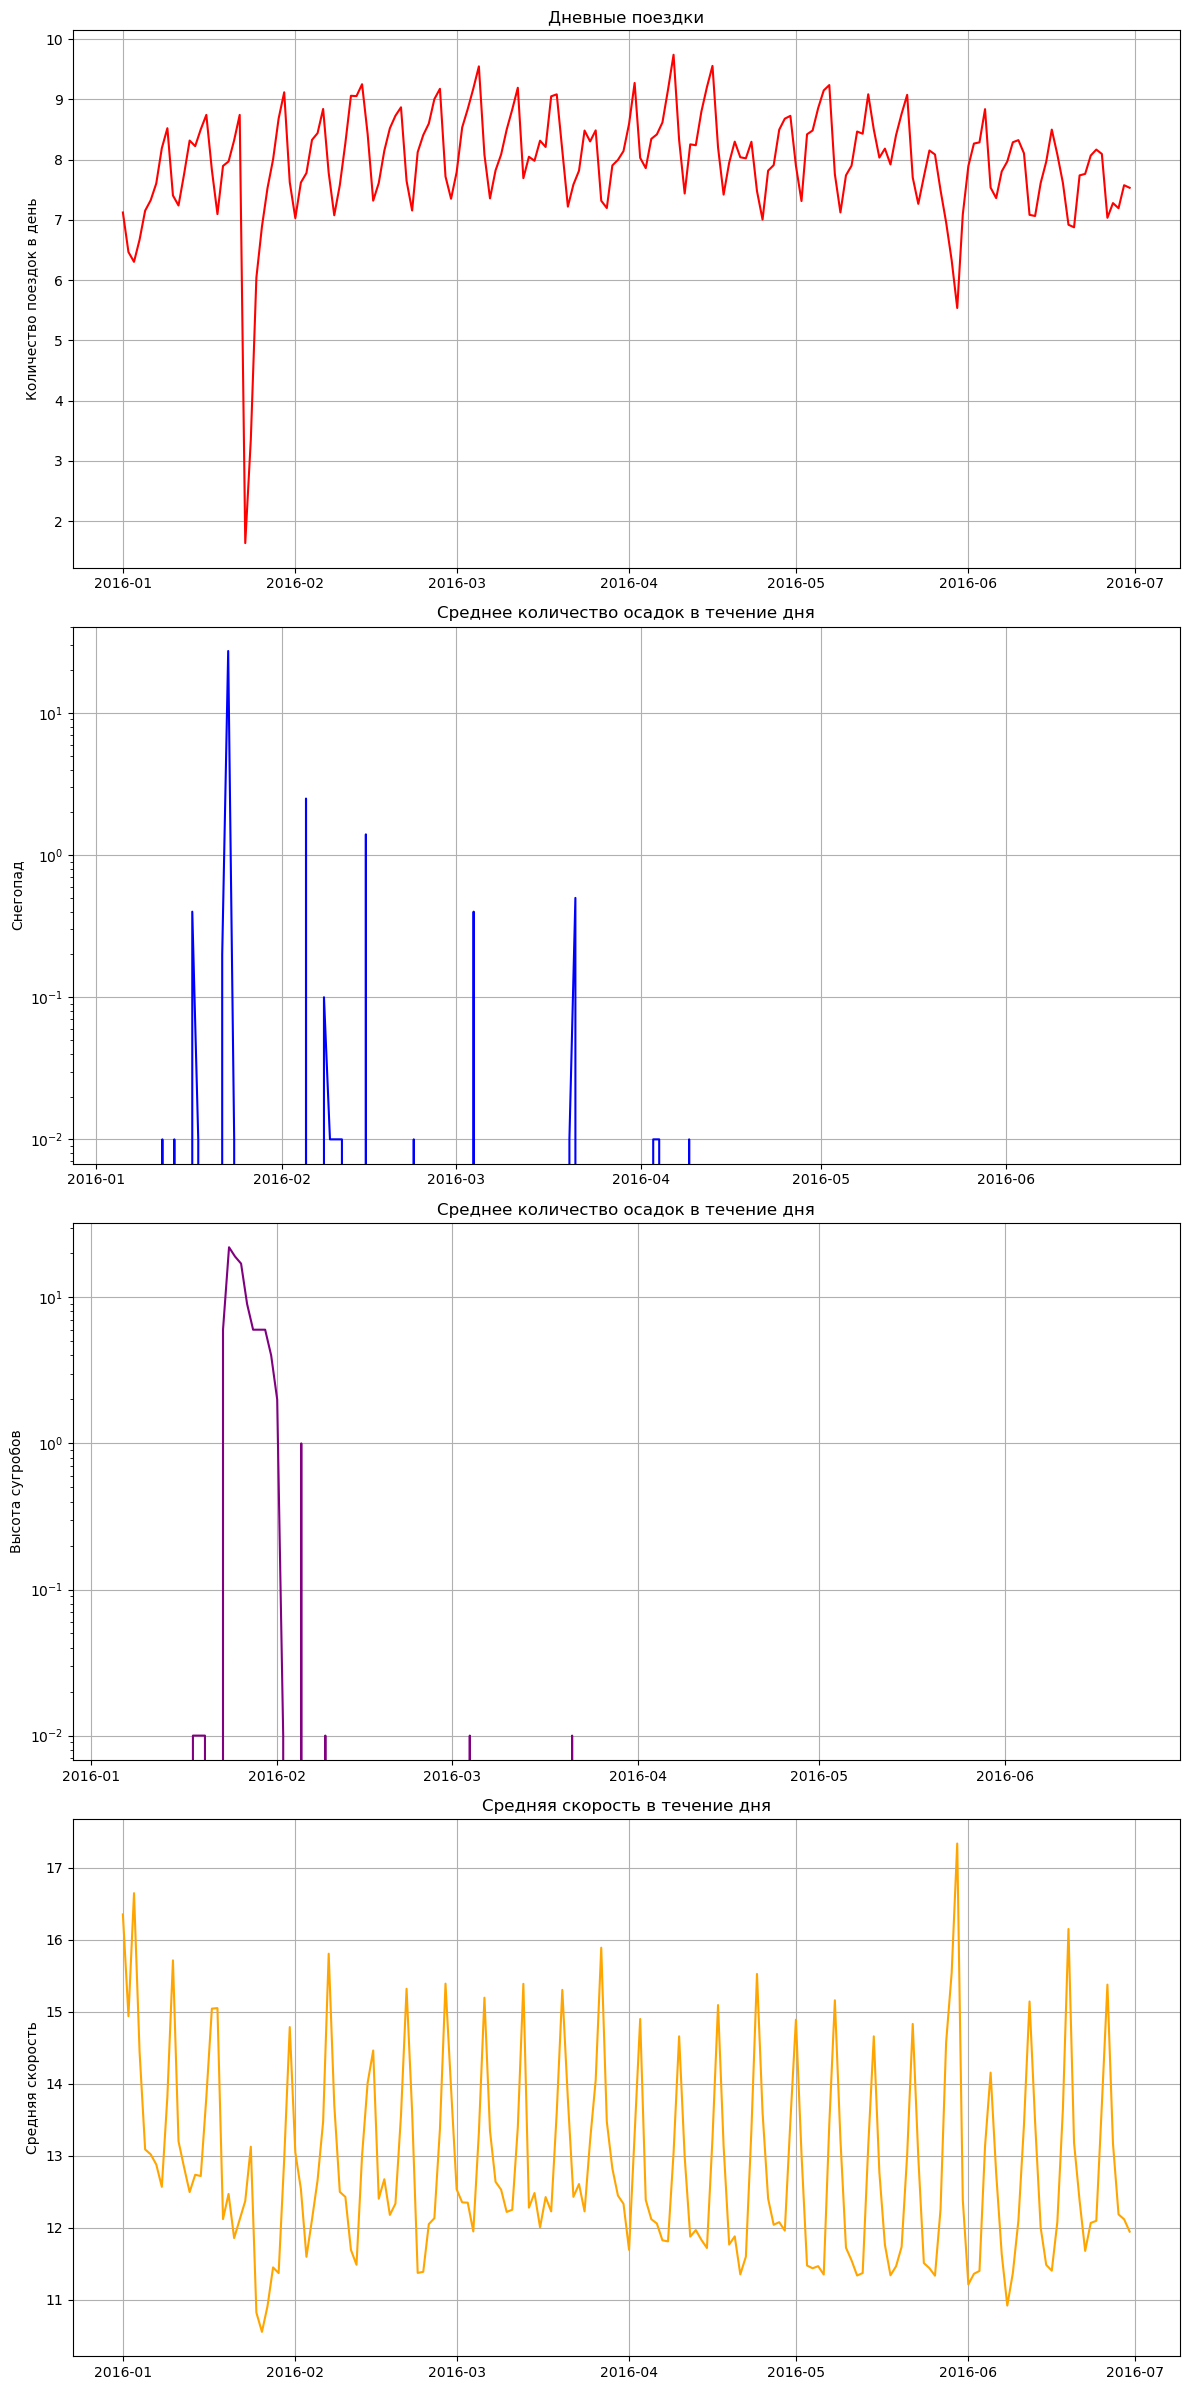

In [76]:
fig, axs = plt.subplots(4, 1, figsize=(12, 24))


trips_per_day = train_data.groupby('pickup_datetime').size().reset_index(name='count')
axs[0].plot(trips_per_day['pickup_datetime'], trips_per_day['count'] / 1e3, color='red', linewidth=1.5)
axs[0].set_ylabel("Количество поездок в день")
axs[0].set_title("Дневные поездки")
axs[0].grid()

snow_fall_data = train_data.groupby('pickup_datetime').agg(
    trips=('pickup_datetime', 'size'),
    snow_fall=('s_fall', 'mean'),
    rain_fall=('rain', 'mean'),
    all_precip=('all_precip', 'mean')
).reset_index()

axs[1].plot(snow_fall_data['pickup_datetime'], snow_fall_data['snow_fall'], color='blue', linewidth=1.5)
axs[1].set_ylabel("Снегопад")
axs[1].set_title("Среднее количество осадок в течение дня")
axs[1].set_yscale('log')
axs[1].set_xlim(pd.to_datetime(["2015-12-28", "2016-06-30"]))
axs[1].grid()


snow_depth_data = train_data.groupby('pickup_datetime').agg(
    trips=('pickup_datetime', 'size'),
    snow_depth=('s_depth', 'mean')
).reset_index()

axs[2].plot(snow_depth_data['pickup_datetime'], snow_depth_data['snow_depth'], color='purple', linewidth=1.5)
axs[2].set_ylabel("Высота сугробов")
axs[2].set_title("Среднее количество осадок в течение дня")
axs[2].set_yscale('log')
axs[2].set_xlim(pd.to_datetime(["2015-12-29", "2016-06-30"]))
axs[2].grid()


median_speed_data = train_data.groupby('pickup_datetime').agg(
    median_speed=('speed_kmh', 'median')
).reset_index()

axs[3].plot(median_speed_data['pickup_datetime'], median_speed_data['median_speed'], color='orange', linewidth=1.5)
axs[3].set_ylabel("Средняя скорость")
axs[3].set_title("Средняя скорость в течение дня")
axs[3].grid()

plt.tight_layout()
plt.show()

Падение объема поездок соответствует самому большому (и первому?) снегопаду этой зимы в Нью-Йорке (23 января). Фактически, Нью-Йорк пострадал от метели и рекордного снегопада. Влияние на схемы движения было колоссальным, а средняя скорость заметно замедлилась. (Обратите внимание на квадратный корень оси Y на двух средних графиках.)

Теперь, приводит ли меньшее количество поездок в снежную погоду к более длительным поездкам? Чтобы ответить на этот вопрос, мы рассмотрим диаграмму рассеяния между средней продолжительностью поездки и общим количеством осадков (дождь + снег) за все дни в нашей выборке:

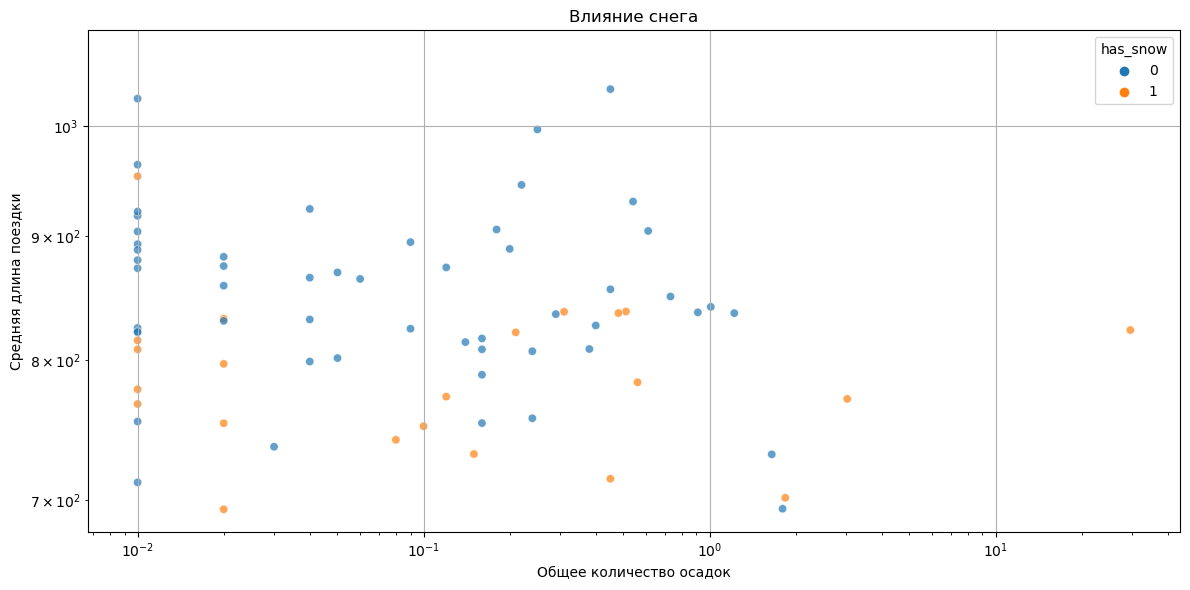

In [77]:
grouped_data = train_data.groupby(['pickup_datetime', 'has_snow']).agg(
    duration=('trip_duration', 'mean'),
    all_precip=('all_precip', 'mean')
).reset_index()


plt.figure(figsize=(12, 6))
sns.scatterplot(data=grouped_data, x='all_precip', y='duration', hue='has_snow', alpha=0.7)

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Общее количество осадок")
plt.ylabel("Средняя длина поездки")
plt.title("Влияние снега")
plt.grid()


plt.tight_layout()
plt.show()

Мы обнаружили, что за исключением снежного дня с длительными поездками, снег, скорее всего, приведет к более коротким поездкам. Однако это может просто означать, что пассажиры с большей вероятностью будут путешествовать на более короткие расстояния, так как же сравнивается средняя скорость?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


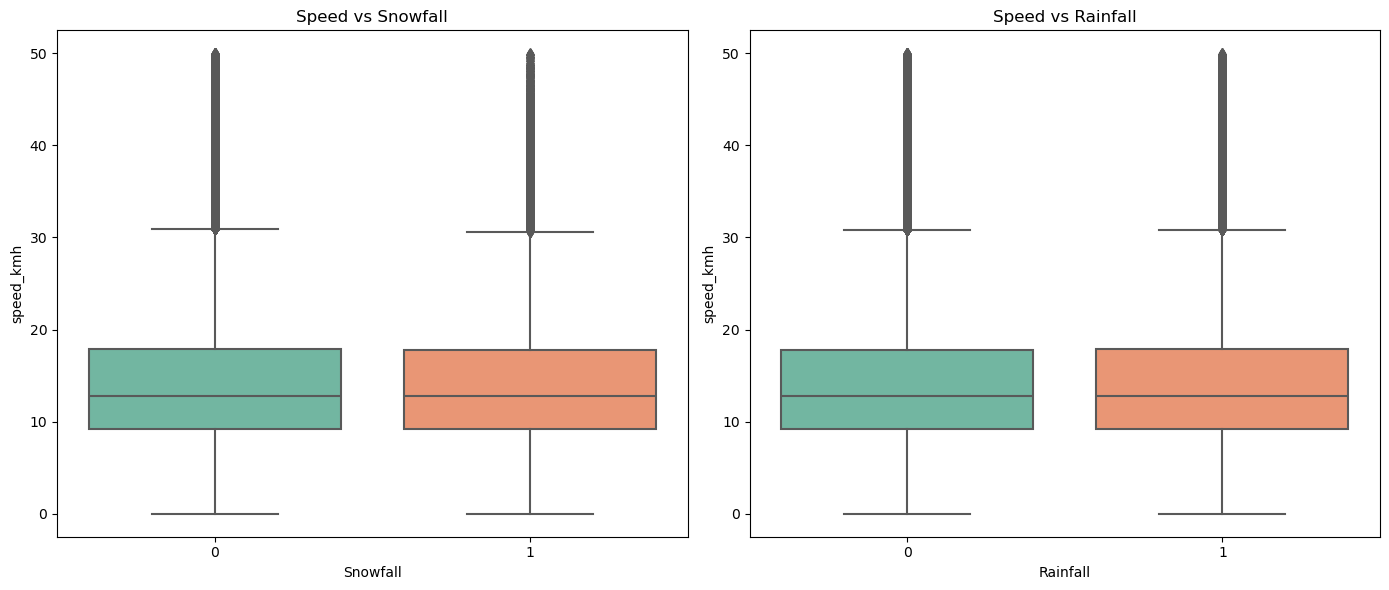

In [78]:
filtered_data = train_data[train_data['speed_kmh'] < 50]


fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.boxplot(data=filtered_data, x='has_snow', y='speed_kmh', ax=axes[0], palette='Set2')
axes[0].set_xlabel("Snowfall")
axes[0].set_title("Speed vs Snowfall")
axes[0].legend().set_visible(False)


sns.boxplot(data=filtered_data, x='has_rain', y='speed_kmh', ax=axes[1], palette='Set2')
axes[1].set_xlabel("Rainfall")
axes[1].set_title("Speed vs Rainfall")
axes[1].legend().set_visible(False)


plt.tight_layout()

plt.show()

Мы обнаружили, что здесь нет существенной разницы. Более того, 23 января (метель) не находится в верхней части списка снежных дней с самой длинной медианной продолжительностью поездки (хотя он входит в первую десятку).

In [79]:
filtered_data = train_data[train_data['has_snow'] == True]
result = (
    filtered_data.groupby('pickup_datetime')
    .agg(med_duration=('trip_duration', 'median'),
         med_speed=('speed_kmh', 'median'))
    .reset_index()
    .sort_values(by='med_duration', ascending=False)
    .head(10)
)
print(result)

   pickup_datetime  med_duration  med_speed
10      2016-01-26         824.0  10.553925
9       2016-01-25         805.0  10.821160
11      2016-01-27         752.0  10.910708
12      2016-01-28         732.0  11.448651
13      2016-01-29         705.0  11.369691
22      2016-02-11         670.0  11.692201
25      2016-03-04         663.0  11.948005
24      2016-02-23         662.0  11.372269
7       2016-01-23         660.0  12.371146
4       2016-01-19         656.0  12.119299


Однако мы можем заметить другую интересную закономерность в этой таблице, если посмотрим на 5 самых медленных снежных дней. Интересно, что самые низкие средние скорости наблюдались через два дня после метели: с 25 по 27 января (хотя обратите внимание, что день сразу после метели, 24 января, был воскресеньем):

In [80]:
result = (
    train_data.groupby('pickup_datetime')
    .agg(med_duration=('trip_duration', 'median'),
         med_speed=('speed_kmh', 'median'))
    .reset_index()
    .sort_values(by='med_speed')
    .head(5)
)

print(result)

    pickup_datetime  med_duration  med_speed
25       2016-01-26         824.0  10.553925
24       2016-01-25         805.0  10.821160
26       2016-01-27         752.0  10.910708
159      2016-06-08         768.0  10.918828
152      2016-06-01         761.0  11.212518


# Проверка корреляций

C:\Users\czvzxv\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


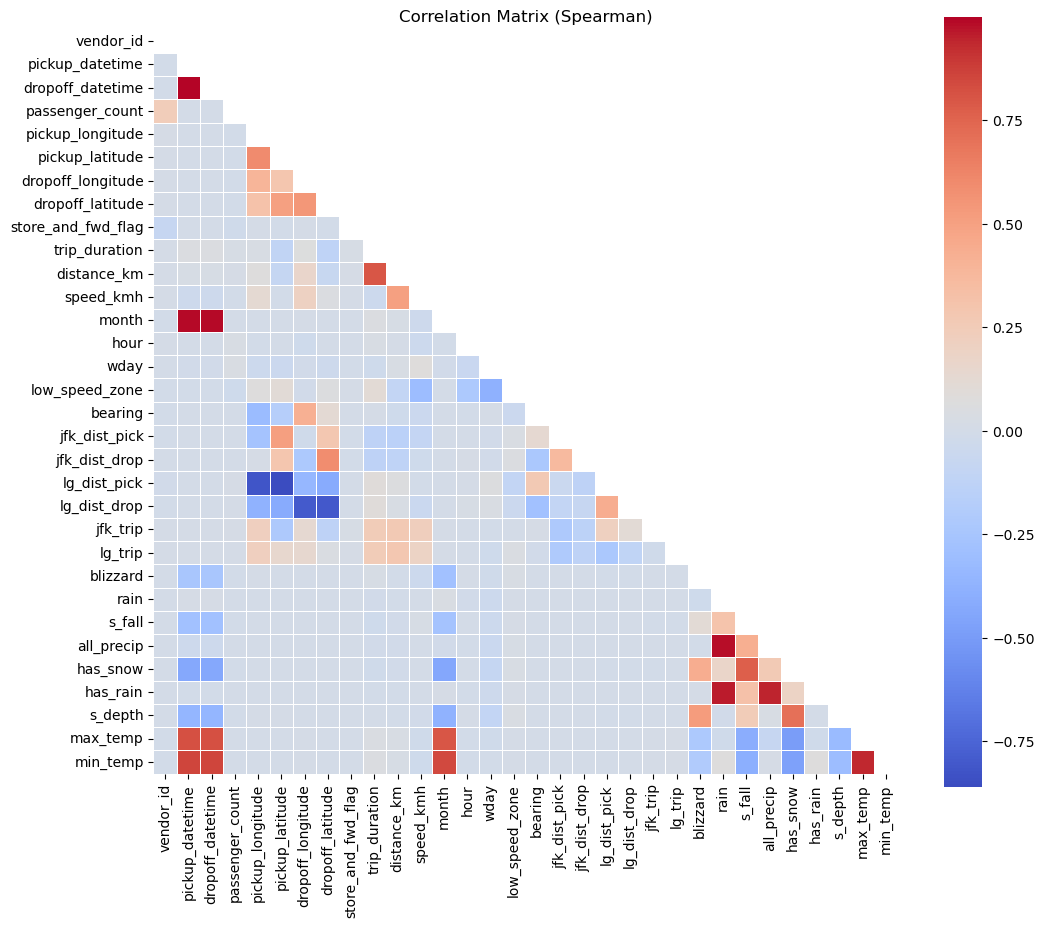

In [81]:
train_data_copy = train_data.copy()

train_data_copy['store_and_fwd_flag'] = train_data_copy['store_and_fwd_flag'].replace({'N': 0, 'Y': 1})
train_data_copy.drop(columns=['id'], inplace=True)

columns_to_convert = [
    'passenger_count', 'vendor_id', 'store_and_fwd_flag',
    'jfk_trip', 'wday', 'month', 'low_speed_zone', 'lg_trip',
    'blizzard', 'has_snow', 'has_rain'
]


for column in columns_to_convert:
    train_data_copy[column] = train_data_copy[column].astype(int)

correlation_matrix = train_data_copy.corr(method='spearman')


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, linewidths=.5, mask=np.triu(correlation_matrix))
plt.title('Correlation Matrix (Spearman)')
plt.show()

Уберём признаки, которые оказывают мало влияние хоть на кого-то

C:\Users\czvzxv\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


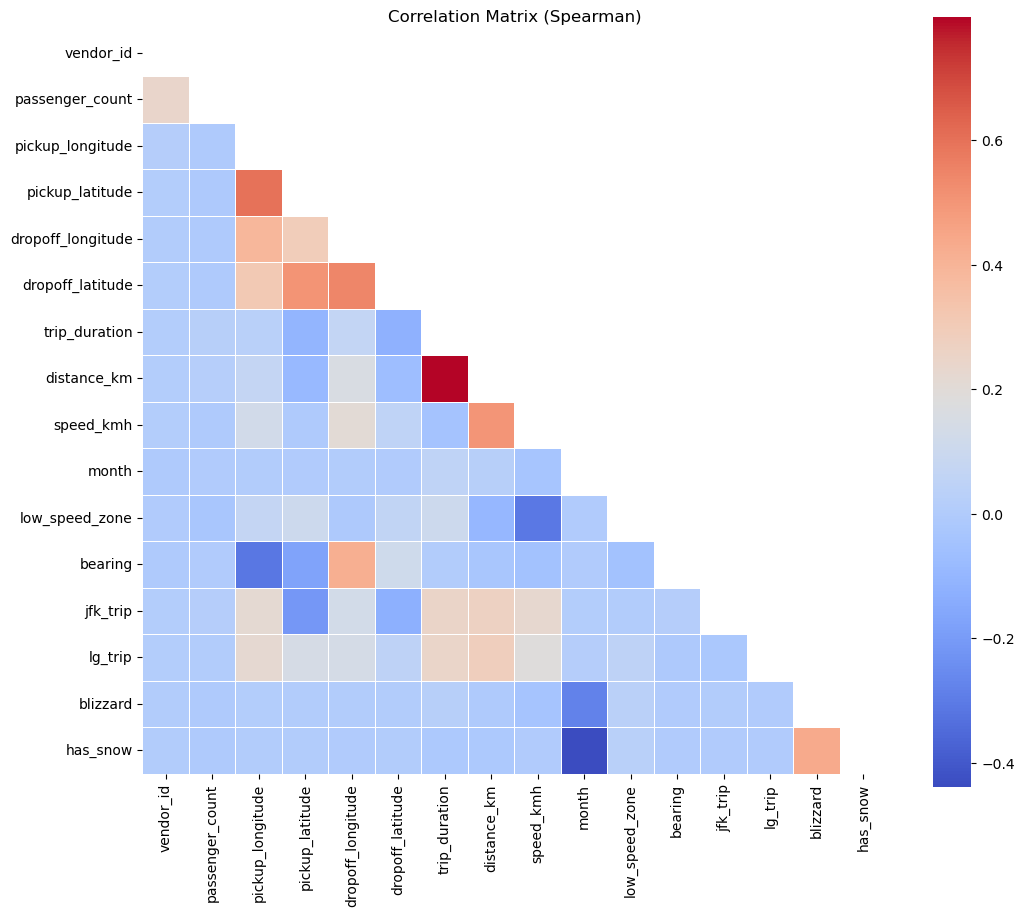

In [82]:
train_data_copy = train_data.copy()


columns_to_drop = [
    'id', 'pickup_datetime', 'dropoff_datetime', 'jfk_dist_pick',
    'jfk_dist_drop', 'lg_dist_pick', 'lg_dist_drop',
    'store_and_fwd_flag', 'hour', 'rain', 's_fall', 'all_precip',
    'has_rain', 's_depth', 'min_temp', 'max_temp',
    'wday'
]

train_data_copy.drop(columns=columns_to_drop, inplace=True)


columns_to_convert = [
    'passenger_count', 'vendor_id',
    'jfk_trip', 'month', 'low_speed_zone', 'lg_trip',
    'blizzard', 'has_snow'
]


for column in columns_to_convert:
    train_data_copy[column] = train_data_copy[column].astype(int)


correlation_matrix = train_data_copy.corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, linewidths=.5, mask=np.triu(correlation_matrix))
plt.title('Correlation Matrix (Spearman)')
plt.show()